## Mario de León 19019
## Javier Valle 20159

In [1]:
# Imports necesarios.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn2
from sklearn.linear_model import LinearRegression
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity
from sklearn.preprocessing import KBinsDiscretizer

##### 1. Haga una exploración rápida de sus datos.

In [2]:
# Carga el dataset utilizando pandas
data = pd.read_csv("dataset.csv")

# Obtén los nombres de las columnas
columnas = data.columns

print("Columnas")
print(columnas)

# Obtén solo las columnas numéricas
datos_numericos = data.select_dtypes(include=[np.number])

# print("Números")
# print(datos_numericos)

# Obtén solo las columnas categóricas
datos_categoricos = data.select_dtypes(include=[object])

# print("Categóricos")
# print(datos_categoricos)

# # Imprimiendo hacia abajo los títulos de los datos numéricos.
# print("Números")
# for columna in datos_numericos:
#     print(columna)

# Lista para almacenar el tipo de cada columna
tipos_de_datos = []

# Recorre cada columna para determinar su tipo
for columna in columnas:
    unique_values = data[columna].unique()
    num_valores_unicos = len(unique_values)
    
    if num_valores_unicos == 2:
        tipos_de_datos.append("Binario")
    elif data[columna].dtype == 'object':
        tipos_de_datos.append("Nominal")
    else:
        tipos_de_datos.append("Ordinal")

# Imprime los resultados
for columna, tipo in zip(columnas, tipos_de_datos):
    print(f"Columna '{columna}' es de tipo: {tipo}")

# Haciendo un summary de los datos.
print(data.describe())

# Volviendo los NaN en ceros.
data = data.fillna(0)


Columnas
Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')
Columna 'Age' es de tipo: Ordinal
Columna 'Number of sexual partners' es de tipo: Nominal
Columna 'First sexual intercourse' es de tipo: Nominal
Columna 'Num of pre

#### 2. Diga el tipo de cada una de las variables del dataset (cualitativa o categórica, cuantitativa continua, cuantitativa discreta)

In [3]:
# Carga el dataset utilizando pandas
data = pd.read_csv("dataset.csv")

# Obtén los nombres de las columnas
columnas = data.columns

# Lista para almacenar el tipo de cada columna
tipos_de_datos = []

# Recorre cada columna para determinar su tipo
for columna in columnas:
    unique_values = data[columna].unique()
    num_valores_unicos = len(unique_values)
    
    if num_valores_unicos == 2:
        tipos_de_datos.append("Binaria")
    elif data[columna].dtype == 'object':
        tipos_de_datos.append("Categórica Nominal")
    elif data[columna].dtype == 'int64':
        tipos_de_datos.append("Cuantitativa Discreta")
    else:
        tipos_de_datos.append("Cuantitativa Continua")

# Imprime los resultados
for columna, tipo in zip(columnas, tipos_de_datos):
    print(f"La columna '{columna}' es de tipo: {tipo}")


La columna 'Age' es de tipo: Cuantitativa Discreta
La columna 'Number of sexual partners' es de tipo: Categórica Nominal
La columna 'First sexual intercourse' es de tipo: Categórica Nominal
La columna 'Num of pregnancies' es de tipo: Categórica Nominal
La columna 'Smokes' es de tipo: Categórica Nominal
La columna 'Smokes (years)' es de tipo: Categórica Nominal
La columna 'Smokes (packs/year)' es de tipo: Categórica Nominal
La columna 'Hormonal Contraceptives' es de tipo: Categórica Nominal
La columna 'Hormonal Contraceptives (years)' es de tipo: Categórica Nominal
La columna 'IUD' es de tipo: Categórica Nominal
La columna 'IUD (years)' es de tipo: Categórica Nominal
La columna 'STDs' es de tipo: Categórica Nominal
La columna 'STDs (number)' es de tipo: Categórica Nominal
La columna 'STDs:condylomatosis' es de tipo: Categórica Nominal
La columna 'STDs:cervical condylomatosis' es de tipo: Binaria
La columna 'STDs:vaginal condylomatosis' es de tipo: Categórica Nominal
La columna 'STDs:vul

##### Como se peude observar, la mayoría de los datos que se tienen en el dataset son categóricos nominales. Asimismo, se puede observar que en otra buena parte del dataset hay variables binarias. Finalmente, cabe destacar que existe una minoría de datos, los cuales son cuantitativos discretos. Con lo anterior mencionado se podría mencionar que en el dataset proporcionado se encuentran tres tipos dominantes, que como ya se mencionó, son: variables categóricas nominales, variables binarias y variables cuantitativas discretas.

##### 3. Incluya los gráficos exploratorios siendo consecuentes con el tipo de variable que están representando.

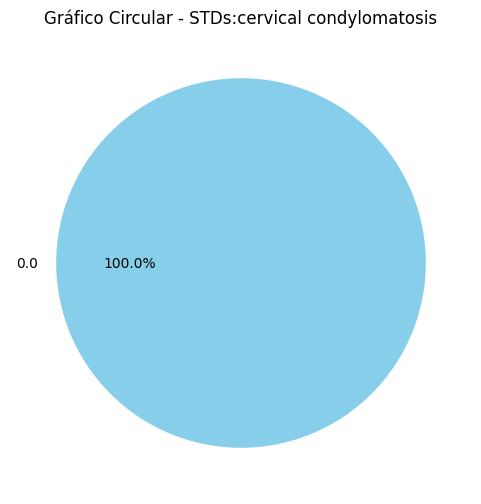

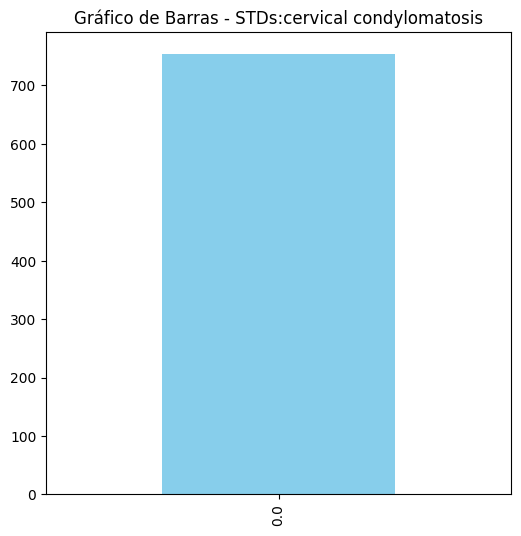

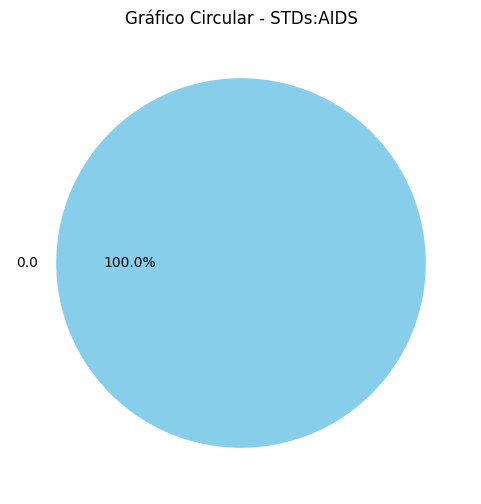

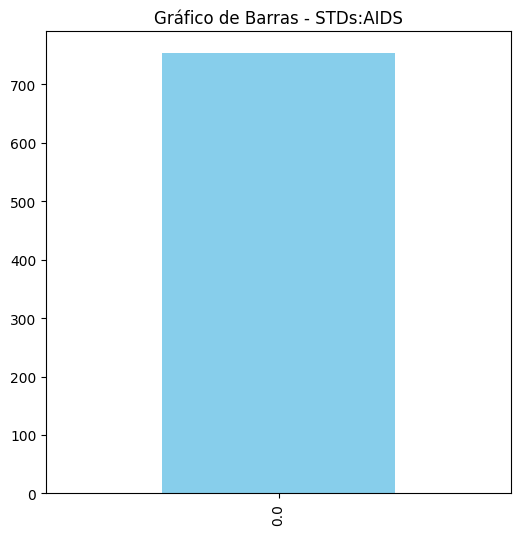

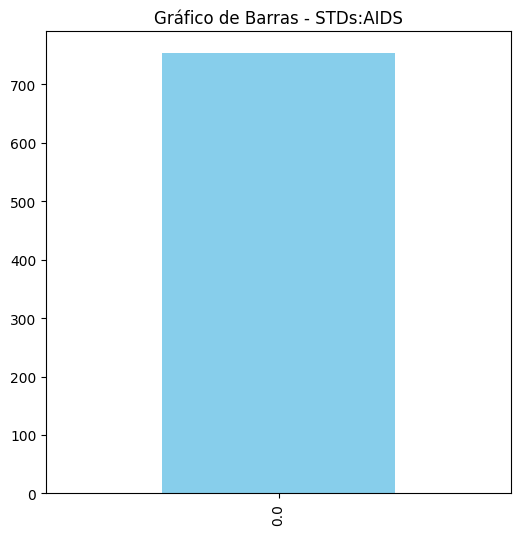

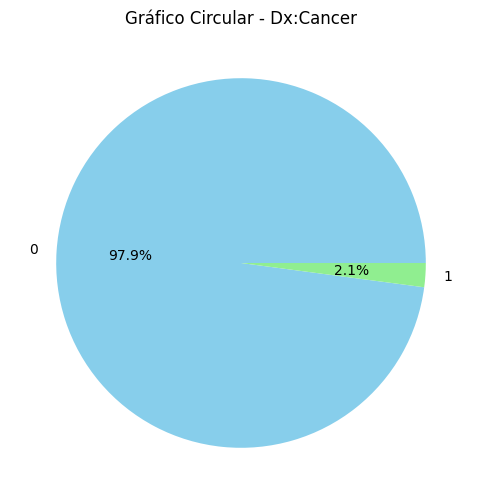

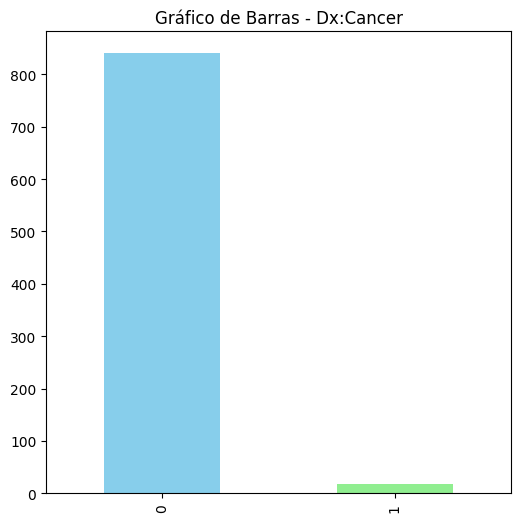

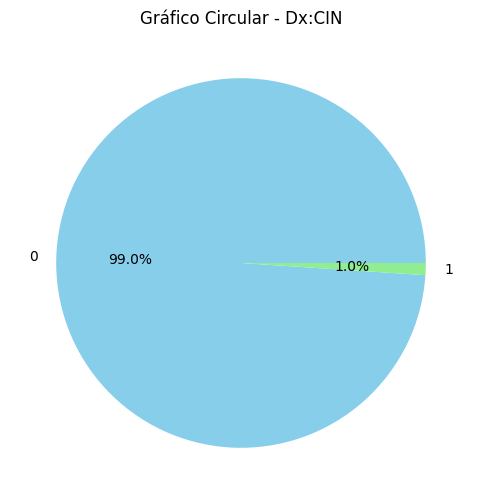

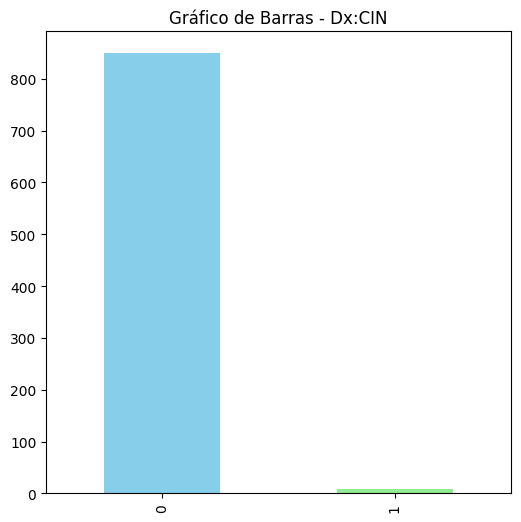

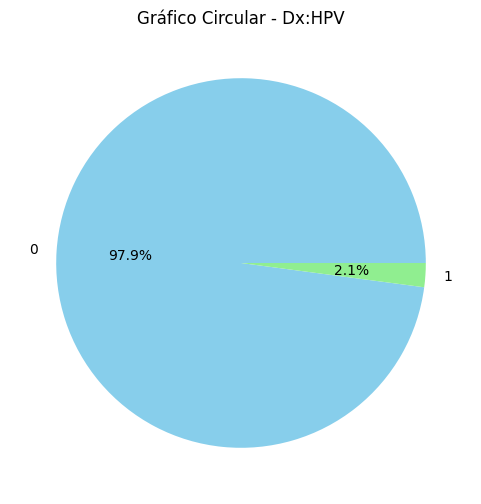

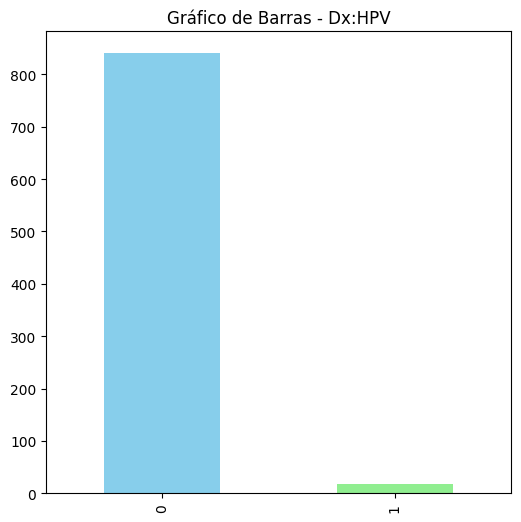

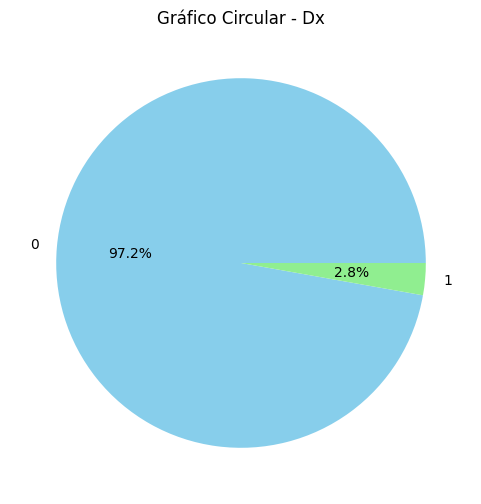

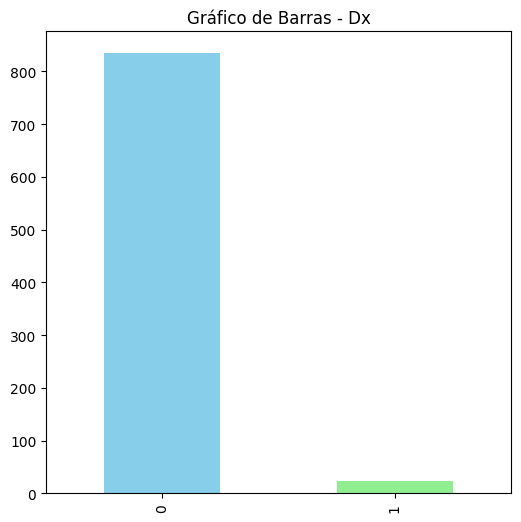

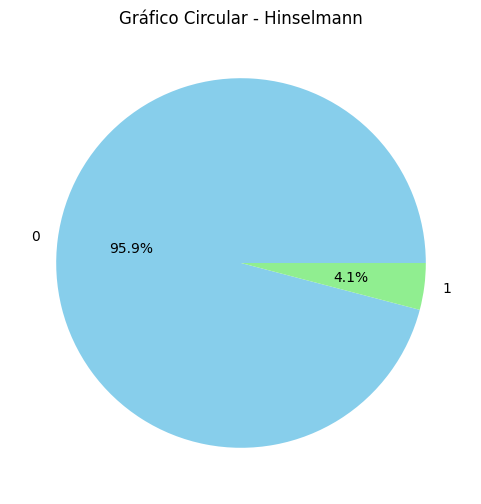

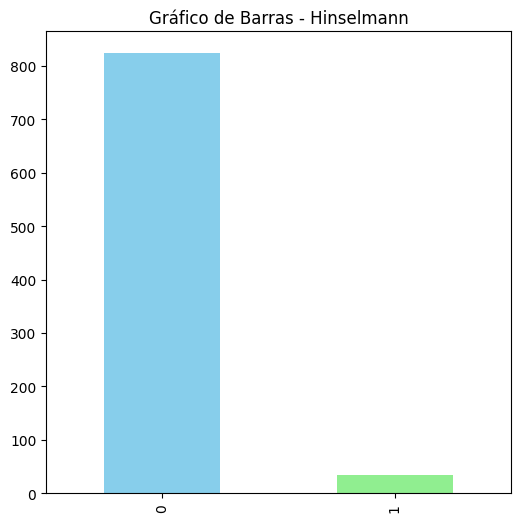

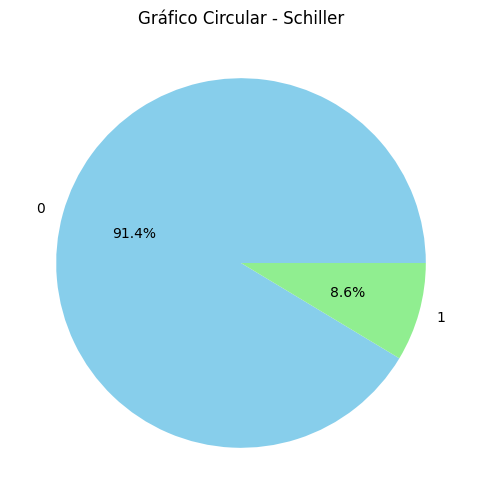

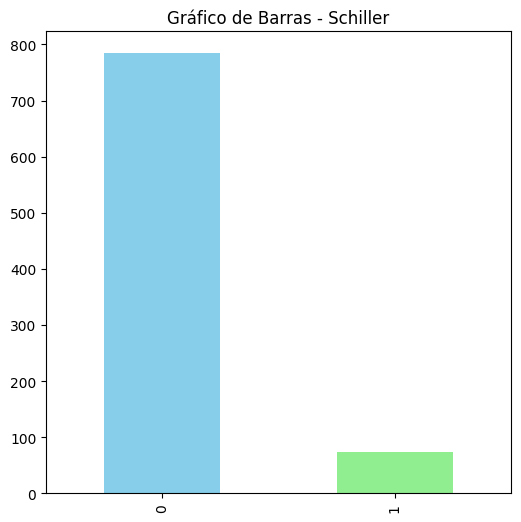

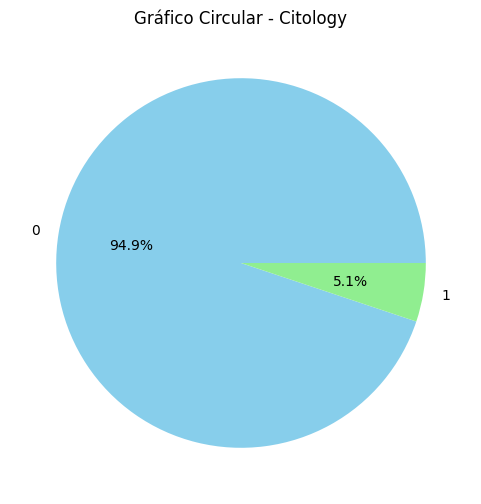

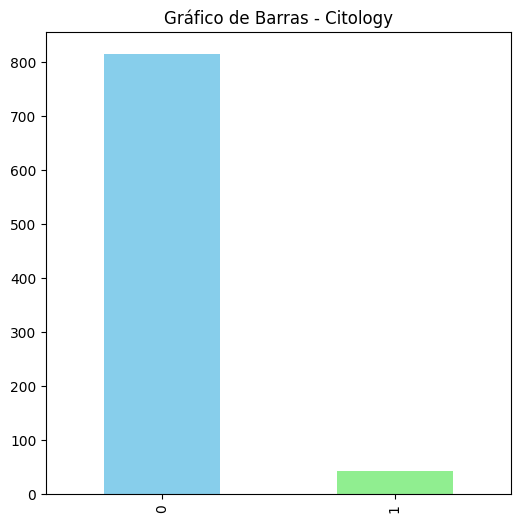

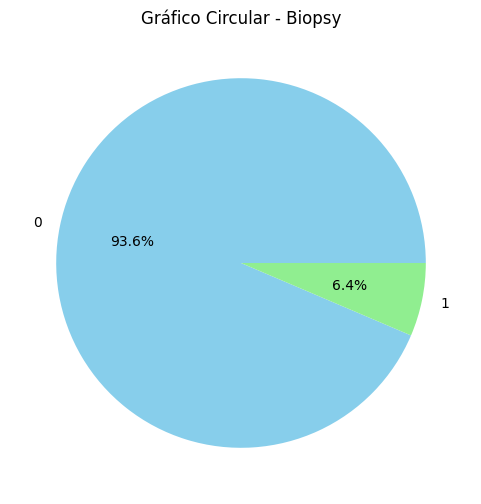

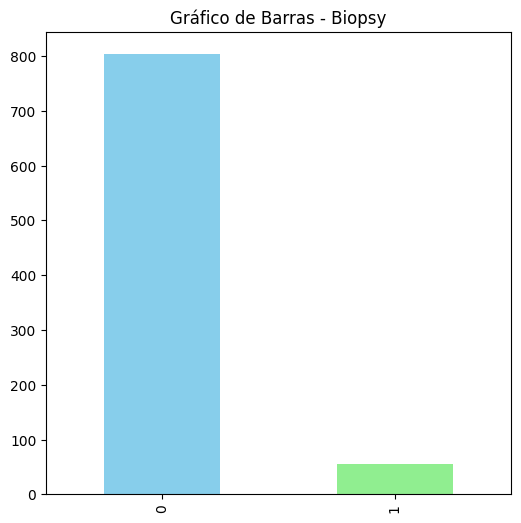

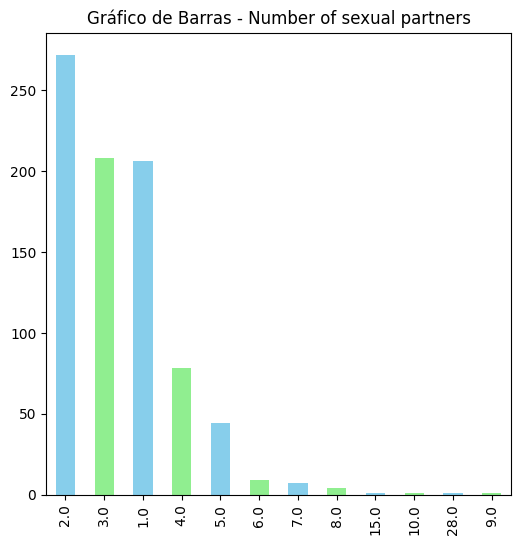

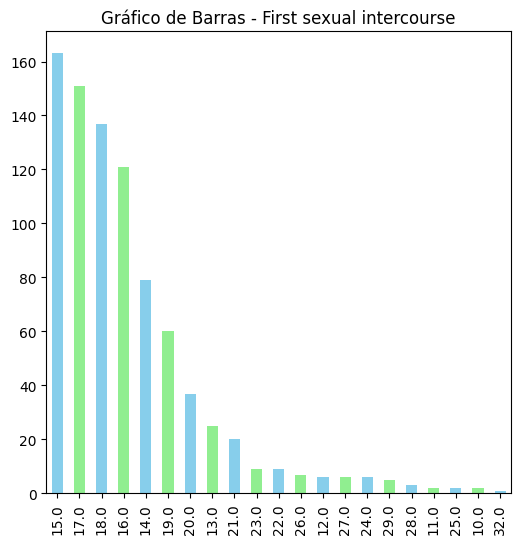

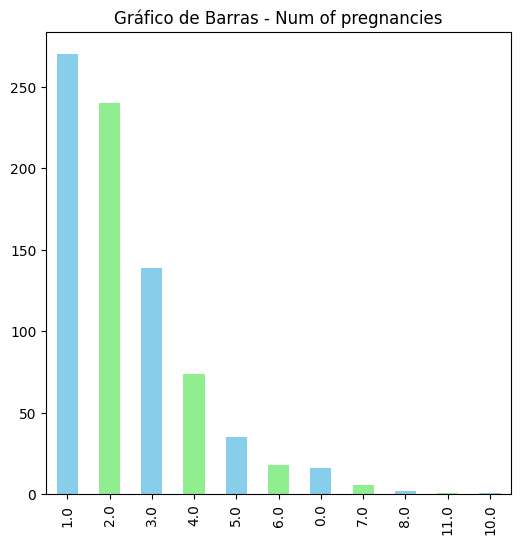

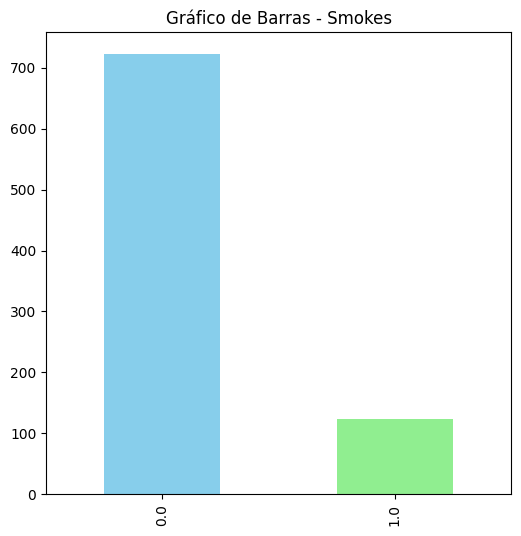

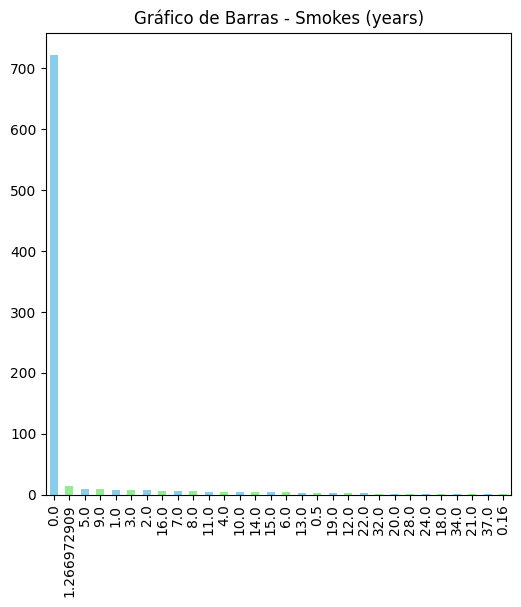

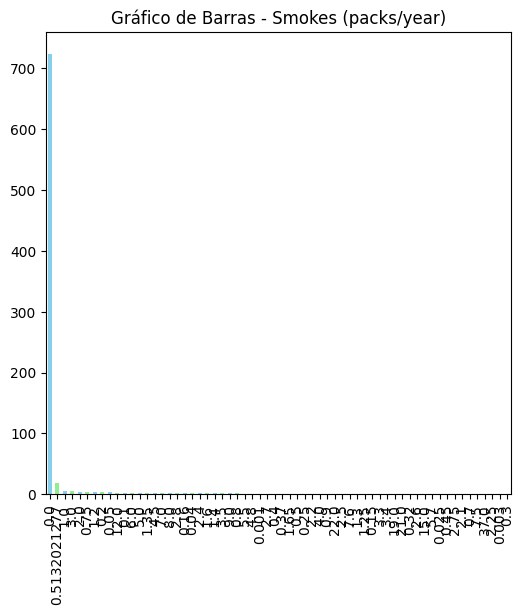

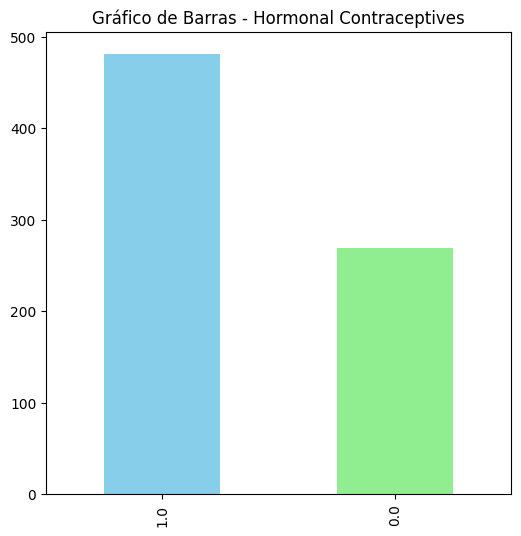

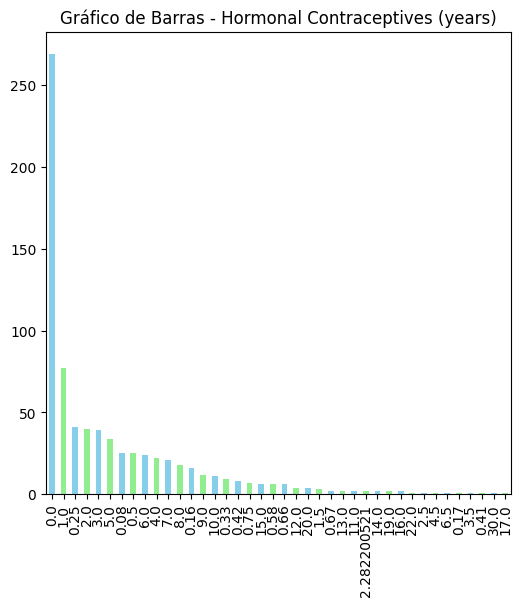

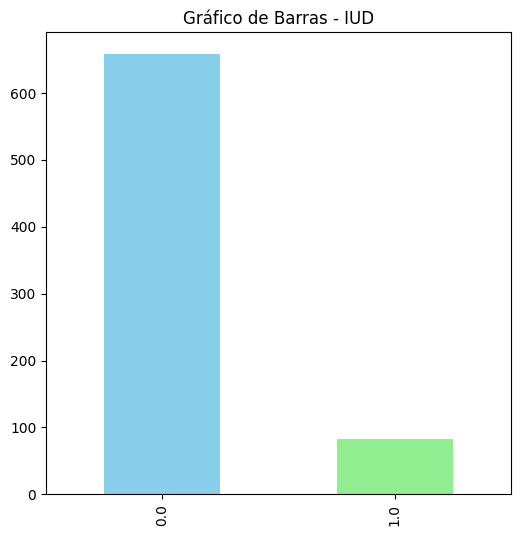

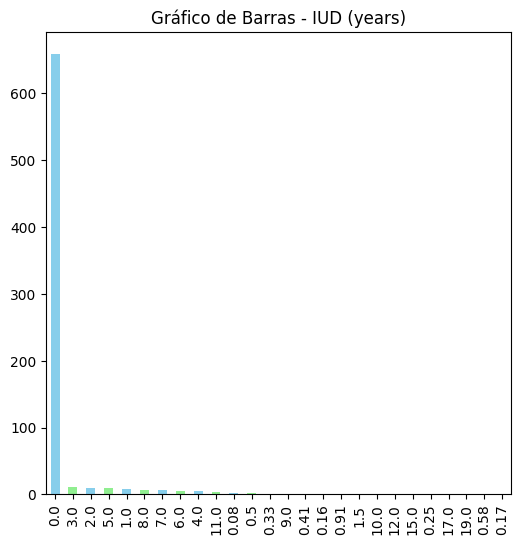

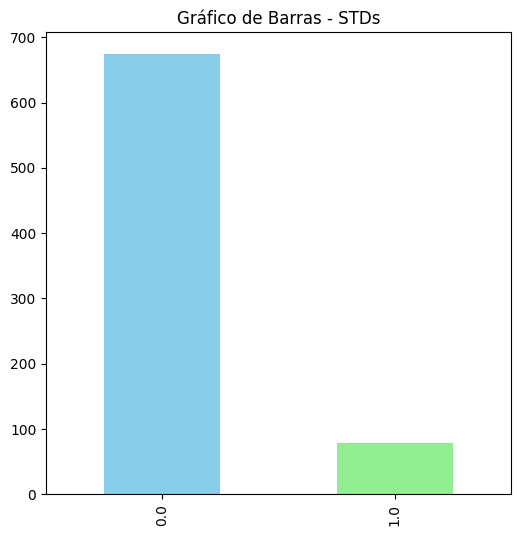

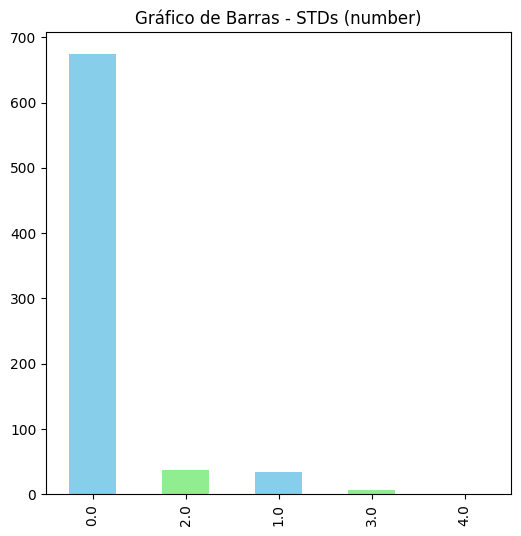

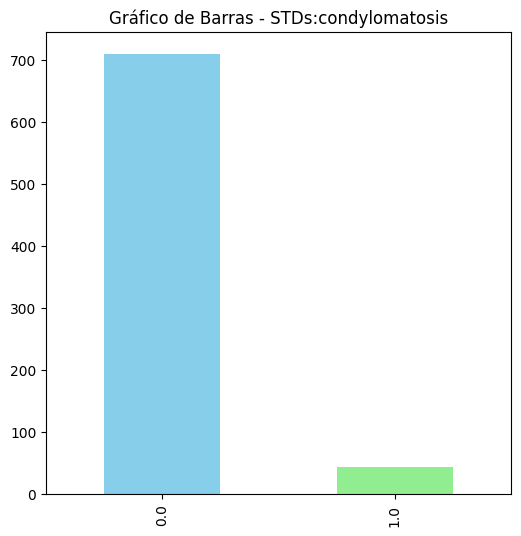

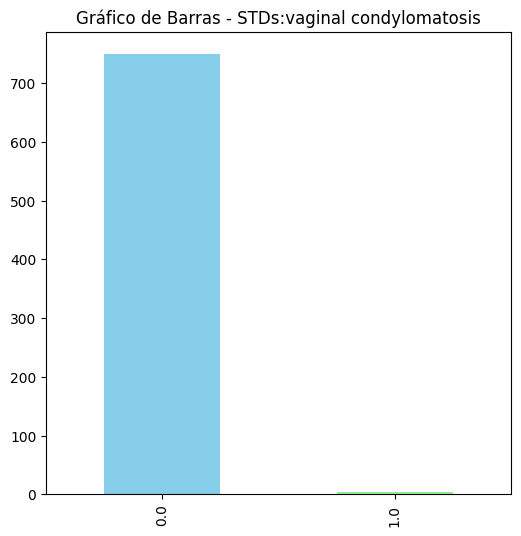

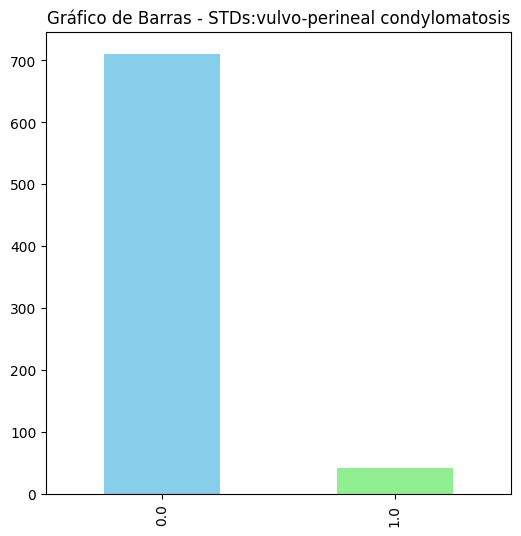

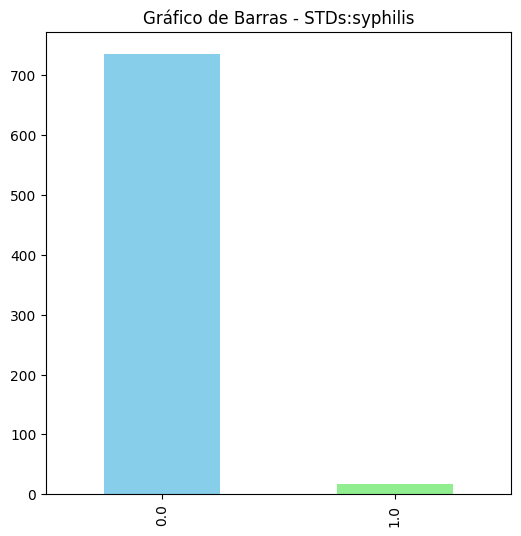

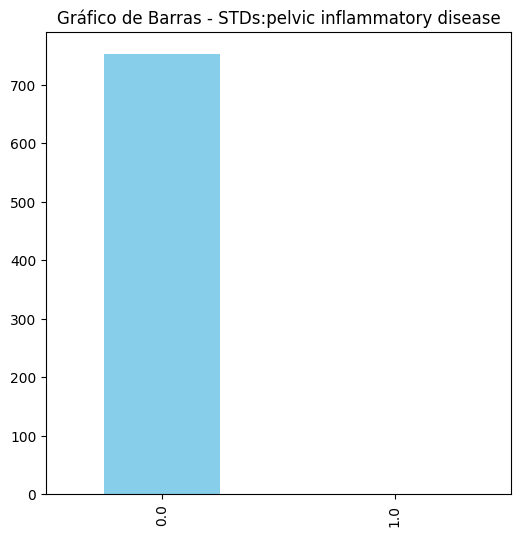

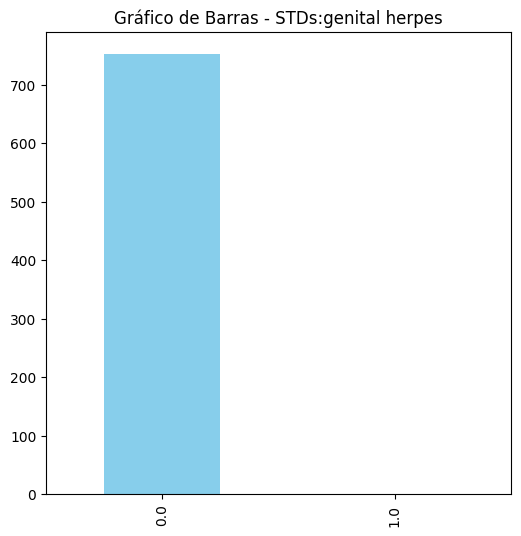

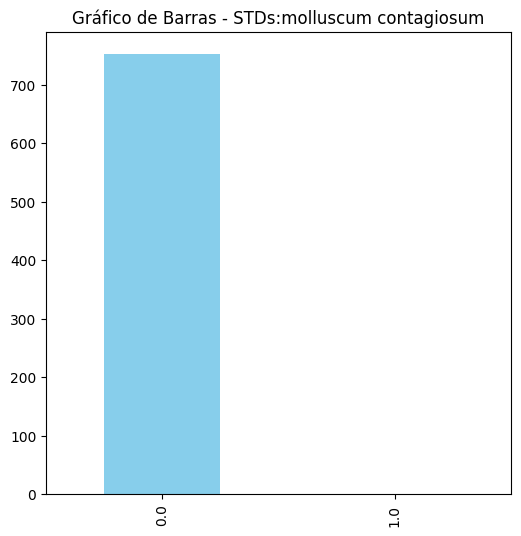

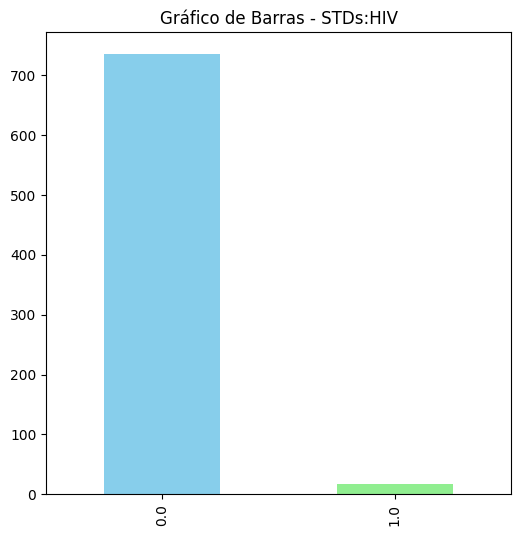

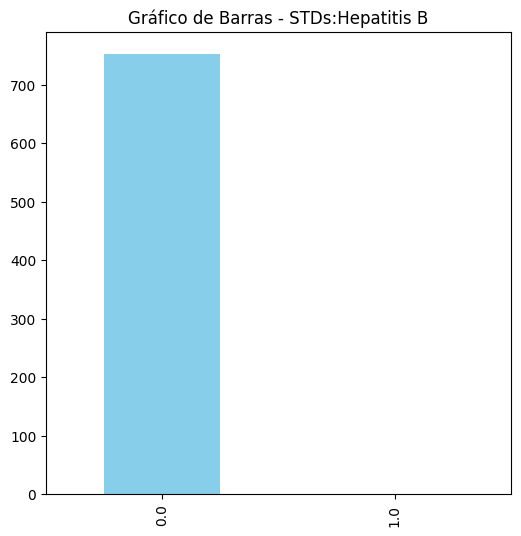

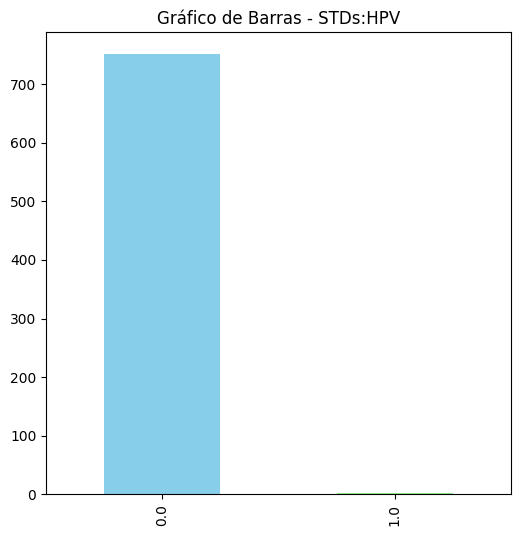

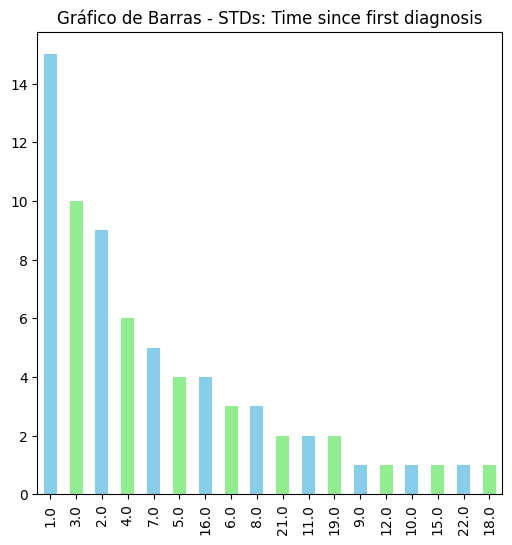

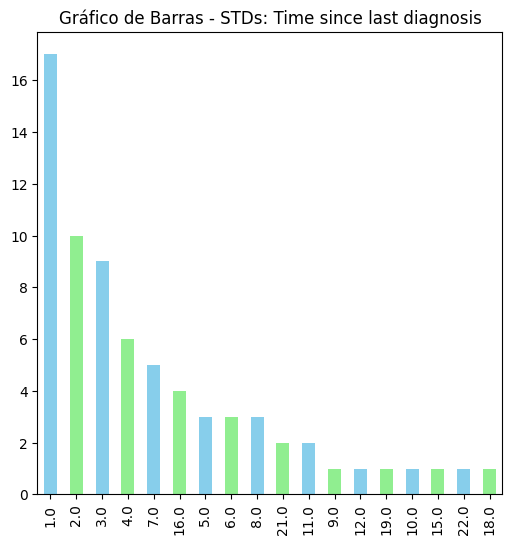

C:\Users\Gamer\AppData\Local\Temp\ipykernel_11504\3841431857.py:401: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(subset[age18to30 & sexpartners5plus]),
C:\Users\Gamer\AppData\Local\Temp\ipykernel_11504\3841431857.py:402: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(subset[~age18to30 & sexpartners5plus]),
C:\Users\Gamer\AppData\Local\Temp\ipykernel_11504\3841431857.py:403: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(subset[age18to30 & ~sexpartners5plus])),


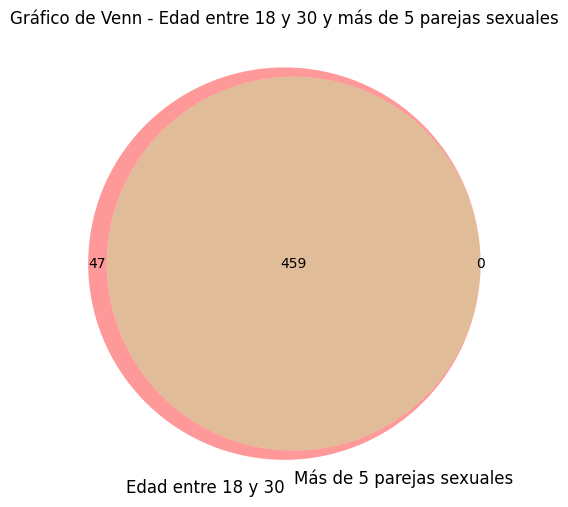

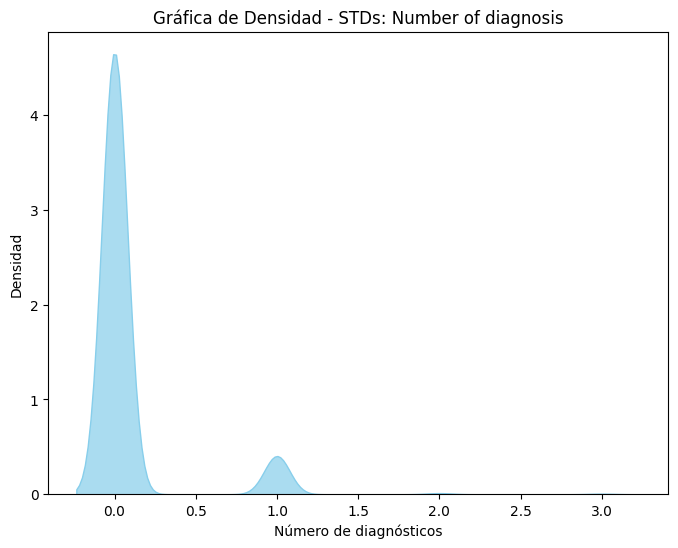

In [4]:
# Carga el dataset utilizando pandas (reemplaza 'dataset.csv' con el nombre de tu archivo CSV)
data = pd.read_csv("dataset.csv")

# Reemplazar "?" con NaN (valores faltantes)
data.replace("?", float("NaN"), inplace=True)

# Obtén los nombres de las columnas
columnas = data.columns

# Lista para almacenar el tipo de cada columna
tipos_de_datos = []

# Recorre cada columna para determinar su tipo
for columna in columnas:
    unique_values = data[columna].unique()
    num_valores_unicos = len(unique_values)

    if num_valores_unicos == 2:
        tipos_de_datos.append("Binaria")
    elif data[columna].dtype == 'object':
        tipos_de_datos.append("Categórica Nominal")
    elif data[columna].dtype == 'int64':
        tipos_de_datos.append("Cuantitativa Discreta")
    else:
        tipos_de_datos.append("Cuantitativa Continua")

# Imprime los resultados
for columna, tipo in zip(columnas, tipos_de_datos):
    if tipo == "Cuantitativa Continua":
        print(columna)

# Haciendo gráficas para las columnas binarias.
# STDs:cervical condylomatosis

# Gráfico Circular o de Pastel
plt.figure(figsize=(6, 6))
data["STDs:cervical condylomatosis"].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title(f"Gráfico Circular - STDs:cervical condylomatosis")
plt.ylabel('')
plt.show()

# Haciendo gráfica de barras de STDs:cervical condylomatosis.
plt.figure(figsize=(6, 6))
data["STDs:cervical condylomatosis"].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title(f"Gráfico de Barras - STDs:cervical condylomatosis")
plt.ylabel('')
plt.show()


# Haciendo gráficas para las columnas binarias.
# STDs:AIDS

# Gráfico Circular o de Pastel
plt.figure(figsize=(6, 6))
data["STDs:AIDS"].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title(f"Gráfico Circular - STDs:AIDS")
plt.ylabel('')
plt.show()

# Haciendo gráfica de barras de STDs:AIDS.
plt.figure(figsize=(6, 6))
data["STDs:AIDS"].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title(f"Gráfico de Barras - STDs:AIDS")
plt.ylabel('')
plt.show()

# Haciendo gráfica de barras.
plt.figure(figsize=(6, 6))
data["STDs:AIDS"].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title(f"Gráfico de Barras - STDs:AIDS")
plt.ylabel('')


# Haciendo gráficas para las columnas binarias.
# Dx:Cancer

# Gráfico Circular o de Pastel
plt.figure(figsize=(6, 6))
data["Dx:Cancer"].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title(f"Gráfico Circular - Dx:Cancer")
plt.ylabel('')
plt.show()

# Haciendo gráfica de barras.
plt.figure(figsize=(6, 6))
data["Dx:Cancer"].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title(f"Gráfico de Barras - Dx:Cancer")
plt.ylabel('')
plt.show()

# Haciendo gráficas para las columnas binarias.
# Dx:CIN

# Gráfico Circular o de Pastel
plt.figure(figsize=(6, 6))
data["Dx:CIN"].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title(f"Gráfico Circular - Dx:CIN")
plt.ylabel('')
plt.show()

# Haciendo gráfica de barras.
plt.figure(figsize=(6, 6))
data["Dx:CIN"].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title(f"Gráfico de Barras - Dx:CIN")
plt.ylabel('')
plt.show()

# Haciendo gráficas para las columnas binarias.
# Dx:HPV

# Gráfico Circular o de Pastel
plt.figure(figsize=(6, 6))
data["Dx:HPV"].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title(f"Gráfico Circular - Dx:HPV")
plt.ylabel('')
plt.show()

# Haciendo gráfica de barras.
plt.figure(figsize=(6, 6))
data["Dx:HPV"].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title(f"Gráfico de Barras - Dx:HPV")
plt.ylabel('')
plt.show()


# Haciendo gráficas para las columnas binarias.
# Dx

# Gráfico Circular o de Pastel
plt.figure(figsize=(6, 6))
data["Dx"].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title(f"Gráfico Circular - Dx")
plt.ylabel('')
plt.show()

# Haciendo gráfica de barras.
plt.figure(figsize=(6, 6))
data["Dx"].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title(f"Gráfico de Barras - Dx")
plt.ylabel('')
plt.show()

# Haciendo gráficas para las columnas binarias.
# Hinselmann

# Gráfico Circular o de Pastel
plt.figure(figsize=(6, 6))
data["Hinselmann"].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title(f"Gráfico Circular - Hinselmann")
plt.ylabel('')
plt.show()

# Haciendo gráfica de barras.
plt.figure(figsize=(6, 6))
data["Hinselmann"].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title(f"Gráfico de Barras - Hinselmann")
plt.ylabel('')
plt.show()

# Haciendo gráficas para las columnas binarias.
# Schiller

# Gráfico Circular o de Pastel
plt.figure(figsize=(6, 6))
data["Schiller"].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title(f"Gráfico Circular - Schiller")
plt.ylabel('')
plt.show()

# Haciendo gráfica de barras.
plt.figure(figsize=(6, 6))
data["Schiller"].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title(f"Gráfico de Barras - Schiller")
plt.ylabel('')
plt.show()

# Haciendo gráficas para las columnas binarias.
# Citology

# Gráfico Circular o de Pastel
plt.figure(figsize=(6, 6))
data["Citology"].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title(f"Gráfico Circular - Citology")
plt.ylabel('')
plt.show()

# Haciendo gráfica de barras.
plt.figure(figsize=(6, 6))
data["Citology"].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title(f"Gráfico de Barras - Citology")
plt.ylabel('')
plt.show()

# Haciendo gráficas para las columnas binarias.
# Biopsy

# Gráfico Circular o de Pastel
plt.figure(figsize=(6, 6))
data["Biopsy"].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title(f"Gráfico Circular - Biopsy")
plt.ylabel('')
plt.show()

# Haciendo gráfica de barras.
plt.figure(figsize=(6, 6))
data["Biopsy"].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title(f"Gráfico de Barras - Biopsy")
plt.ylabel('')
plt.show()

# Haciendo gráfica de barras para Number of sexual partners.
plt.figure(figsize=(6, 6))
data["Number of sexual partners"].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title(f"Gráfico de Barras - Number of sexual partners")
plt.ylabel('')
plt.show()

# Haciendo gráfica de barras para First sexual intercourse.
plt.figure(figsize=(6, 6))
data["First sexual intercourse"].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title(f"Gráfico de Barras - First sexual intercourse")
plt.ylabel('')
plt.show()

# Haciendo gráfica de barras para Num of pregnancies.
plt.figure(figsize=(6, 6))
data["Num of pregnancies"].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title(f"Gráfico de Barras - Num of pregnancies")
plt.ylabel('')
plt.show()

# Haciendo gráfica de barras para Smokes
plt.figure(figsize=(6, 6))
data["Smokes"].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title("Gráfico de Barras - Smokes")
plt.ylabel('')
plt.show()

# Haciendo gráfica de barras para Smokes (years)
plt.figure(figsize=(6, 6))
data["Smokes (years)"].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title("Gráfico de Barras - Smokes (years)")
plt.ylabel('')
plt.show()

# Haciendo gráfica de barras para Smokes (packs/year)
plt.figure(figsize=(6, 6))
data["Smokes (packs/year)"].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title("Gráfico de Barras - Smokes (packs/year)")
plt.ylabel('')
plt.show()

# Haciendo gráfica de barras para Hormonal Contraceptives
plt.figure(figsize=(6, 6))
data["Hormonal Contraceptives"].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title("Gráfico de Barras - Hormonal Contraceptives")
plt.ylabel('')
plt.show()

# Haciendo gráfica de barras para Hormonal Contraceptives (years)
plt.figure(figsize=(6, 6))
data["Hormonal Contraceptives (years)"].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title("Gráfico de Barras - Hormonal Contraceptives (years)")
plt.ylabel('')
plt.show()

# Haciendo gráfica de barras para IUD
plt.figure(figsize=(6, 6))
data["IUD"].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title("Gráfico de Barras - IUD")
plt.ylabel('')
plt.show()

# Haciendo gráfica de barras para IUD (years)
plt.figure(figsize=(6, 6))
data["IUD (years)"].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title("Gráfico de Barras - IUD (years)")
plt.ylabel('')
plt.show()

# Haciendo gráfica de barras para STDs
plt.figure(figsize=(6, 6))
data["STDs"].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title("Gráfico de Barras - STDs")
plt.ylabel('')
plt.show()

# Haciendo gráfica de barras para STDs (number)
plt.figure(figsize=(6, 6))
data["STDs (number)"].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title("Gráfico de Barras - STDs (number)")
plt.ylabel('')
plt.show()

# Haciendo gráfica de barras para STDs:condylomatosis
plt.figure(figsize=(6, 6))
data["STDs:condylomatosis"].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title("Gráfico de Barras - STDs:condylomatosis")
plt.ylabel('')
plt.show()

# Haciendo gráfica de barras para STDs:vaginal condylomatosis
plt.figure(figsize=(6, 6))
data["STDs:vaginal condylomatosis"].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title("Gráfico de Barras - STDs:vaginal condylomatosis")
plt.ylabel('')
plt.show()

# Haciendo gráfica de barras para STDs:vulvo-perineal condylomatosis
plt.figure(figsize=(6, 6))
data["STDs:vulvo-perineal condylomatosis"].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title("Gráfico de Barras - STDs:vulvo-perineal condylomatosis")
plt.ylabel('')
plt.show()

# Haciendo gráfica de barras para STDs:syphilis
plt.figure(figsize=(6, 6))
data["STDs:syphilis"].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title("Gráfico de Barras - STDs:syphilis")
plt.ylabel('')
plt.show()

# Haciendo gráfica de barras para STDs:pelvic inflammatory disease
plt.figure(figsize=(6, 6))
data["STDs:pelvic inflammatory disease"].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title("Gráfico de Barras - STDs:pelvic inflammatory disease")
plt.ylabel('')
plt.show()

# Haciendo gráfica de barras para STDs:genital herpes
plt.figure(figsize=(6, 6))
data["STDs:genital herpes"].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title("Gráfico de Barras - STDs:genital herpes")
plt.ylabel('')
plt.show()

# Haciendo gráfica de barras para STDs:molluscum contagiosum
plt.figure(figsize=(6, 6))
data["STDs:molluscum contagiosum"].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title("Gráfico de Barras - STDs:molluscum contagiosum")
plt.ylabel('')
plt.show()

# Haciendo gráfica de barras para STDs:HIV
plt.figure(figsize=(6, 6))
data["STDs:HIV"].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title("Gráfico de Barras - STDs:HIV")
plt.ylabel('')
plt.show()

# Haciendo gráfica de barras para STDs:Hepatitis B
plt.figure(figsize=(6, 6))
data["STDs:Hepatitis B"].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title("Gráfico de Barras - STDs:Hepatitis B")
plt.ylabel('')
plt.show()

# Haciendo gráfica de barras para STDs:HPV
plt.figure(figsize=(6, 6))
data["STDs:HPV"].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title("Gráfico de Barras - STDs:HPV")
plt.ylabel('')
plt.show()

# Haciendo gráfica de barras para STDs: Time since first diagnosis
plt.figure(figsize=(6, 6))
data["STDs: Time since first diagnosis"].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title("Gráfico de Barras - STDs: Time since first diagnosis")
plt.ylabel('')
plt.show()

# Haciendo gráfica de barras para STDs: Time since last diagnosis
plt.figure(figsize=(6, 6))
data["STDs: Time since last diagnosis"].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title("Gráfico de Barras - STDs: Time since last diagnosis")
plt.ylabel('')
plt.show()

# Haciendo una gráfica de venn para Age.
from matplotlib_venn import venn2

# Creando un subconjunto de datos con las columnas de interés
subset = data[["Age", "Number of sexual partners"]]

# Eliminando filas con valores faltantes
subset = subset.dropna()

# Convirtiendo la columna "Number of sexual partners" a tipo numérico
subset['Number of sexual partners'] = pd.to_numeric(subset['Number of sexual partners'])

# Filtrando por la edad entre 18 y 30 años
age18to30 = (subset['Age'] >= 18) & (subset['Age'] <= 30)
subset = subset[age18to30]

# Filtrando por más de 5 parejas sexuales
sexpartners5plus = subset['Number of sexual partners'].apply(lambda x: True if x >= 5 else False)

# Graficando.
plt.figure(figsize=(6, 6))
venn2(subsets=(
    len(subset[age18to30 & sexpartners5plus]),
    len(subset[~age18to30 & sexpartners5plus]),
    len(subset[age18to30 & ~sexpartners5plus])),
    set_labels=('Edad entre 18 y 30', 'Más de 5 parejas sexuales'))
plt.title("Gráfico de Venn - Edad entre 18 y 30 y más de 5 parejas sexuales")
plt.show()


# Haciendo gráfica de densidad para STDs: Number of diagnosis.

# Filtrar la columna "STDs: Number of diagnosis" y eliminar filas con valores faltantes
stds_diagnosis = data["STDs: Number of diagnosis"].dropna()

# Crear la gráfica de densidad
plt.figure(figsize=(8, 6))
sns.kdeplot(data=stds_diagnosis, fill=True, color="skyblue", alpha=0.7)
plt.title("Gráfica de Densidad - STDs: Number of diagnosis")
plt.xlabel("Número de diagnósticos")
plt.ylabel("Densidad")
plt.show()

#### 4. Aísle las variables numéricas de las categóricas, haga un análisis de correlación entre las mismas.

Variables numéricas
Age
STDs: Number of diagnosis
Dx:Cancer
Dx:CIN
Dx:HPV
Dx
Hinselmann
Schiller
Citology
Biopsy
                                Age  STDs: Number of diagnosis  Dx:Cancer  \
Age                        1.000000                  -0.001606   0.110340   
STDs: Number of diagnosis -0.001606                   1.000000  -0.015423   
Dx:Cancer                  0.110340                  -0.015423   1.000000   
Dx:CIN                     0.061443                   0.008070  -0.015072   
Dx:HPV                     0.101722                  -0.015423   0.886508   
Dx                         0.092635                  -0.002289   0.665647   
Hinselmann                -0.003967                   0.076787   0.134264   
Schiller                   0.103283                   0.130873   0.157812   
Citology                  -0.016862                   0.055114   0.113446   
Biopsy                     0.055956                   0.097449   0.160905   

                             Dx:CIN    

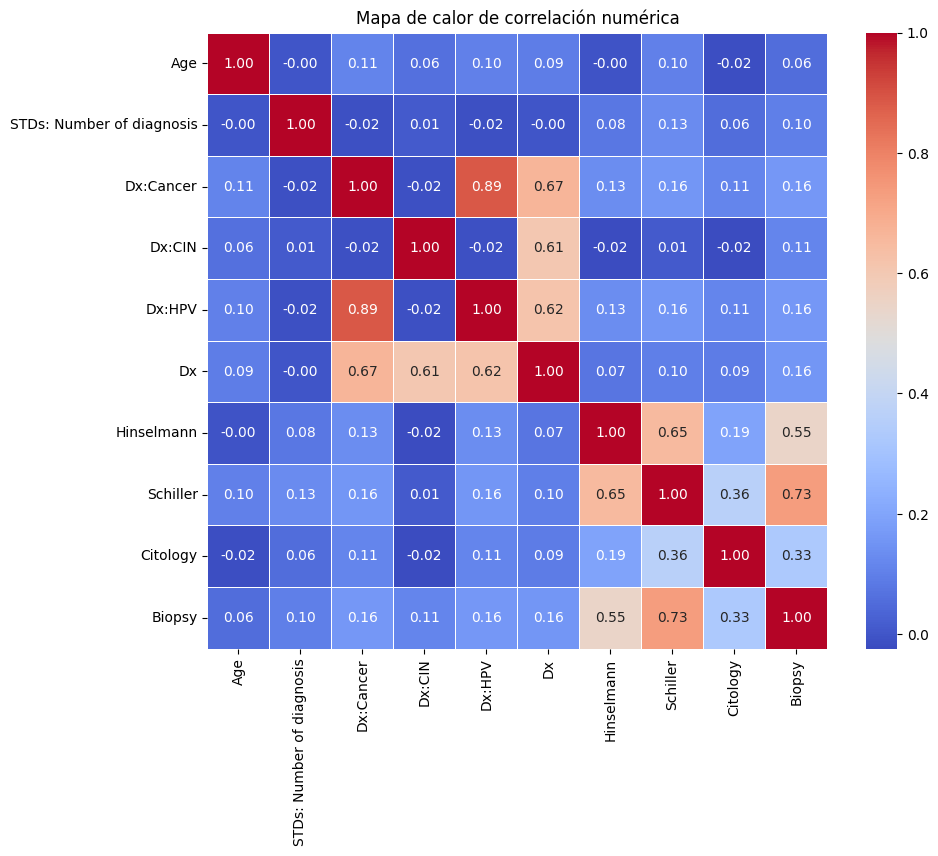

C:\Users\Gamer\AppData\Local\Temp\ipykernel_11504\154508331.py:36: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion = variables_categoricas.corr()


Empty DataFrame
Columns: []
Index: []


ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1000x800 with 0 Axes>

In [5]:
# Seleccionar las variables numéricas
variables_numericas = data.select_dtypes(include=[int, float])
# print("Variables numéricas")
# print(variables_numericas)

# Seleccionar las variables categóricas
variables_categoricas = data.select_dtypes(include=[object])

# Quitando los NaN de las variables categóricas.
variables_categoricas = variables_categoricas.fillna(0)

# print("Variables categóricas")
# print(variables_categoricas)


# Imprimiendo como lista las variables numéricas.
print("Variables numéricas")
for columna in variables_numericas:
    print(columna)

# Obtener la matriz de correlación de las variables numéricas.
matriz_correlacion = variables_numericas.corr()

# Visualizar la matriz de correlación
print(matriz_correlacion)


# Graficando la correlación.

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de calor de correlación numérica')
plt.show()

# Obtener la matriz de correlación de las variables categóricas.
matriz_correlacion = variables_categoricas.corr()

# Visualizar la matriz de correlación
print(matriz_correlacion)

# Graficando la correlación.

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de calor de correlación categórica')
plt.show()

# Haciendo el análisis de correlación de todo el dataset

# Obtener la matriz de correlación de las variables categóricas.
matriz_correlacion = data.corr()

# Visualizar la matriz de correlación
print(matriz_correlacion)

# Graficando la correlación.

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de calor de correlación categórica')
plt.show()

#### Se puede notar que, por lo menos, en las variables numéricas existe una correlación negativa en la mayoría de las variables que se encuentan dentro del dataset. Sin embargo, en las variables categóricas del dataset se puede notar un caso contrario, esto quiere decir que, existe una correlación positiva entre las variables. Asimismo, es importante mencionar que existe una correlación positiva en la mayoría de las variables numéricas y categóricas al momento de estudiar la correlación entre las mismas. Finalmente, es importante mencionar que casi todas las variables del dataset presentan una relación bastante débil entre sí.

#### 5. Utilice las variables categóricas, haga tablas de frecuencia, proporción, gráficas de barras o cualquier otra técnica que le permita explorar los datos.

Variables categóricas
Number of sexual partners
First sexual intercourse
Num of pregnancies
Smokes
Smokes (years)
Smokes (packs/year)
Hormonal Contraceptives
Hormonal Contraceptives (years)
IUD
IUD (years)
STDs
STDs (number)
STDs:condylomatosis
STDs:cervical condylomatosis
STDs:vaginal condylomatosis
STDs:vulvo-perineal condylomatosis
STDs:syphilis
STDs:pelvic inflammatory disease
STDs:genital herpes
STDs:molluscum contagiosum
STDs:AIDS
STDs:HIV
STDs:Hepatitis B
STDs:HPV
STDs: Time since first diagnosis
STDs: Time since last diagnosis


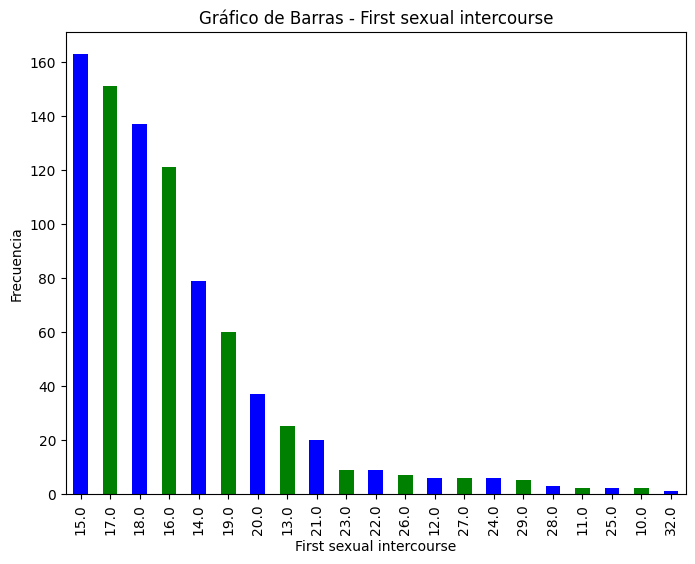

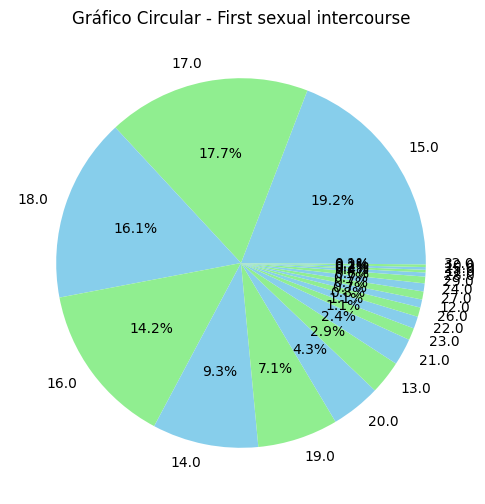

Tabla de Frecuencia - First sexual intercourse:
      First sexual intercourse
15.0                       163
17.0                       151
18.0                       137
16.0                       121
14.0                        79
19.0                        60
20.0                        37
13.0                        25
21.0                        20
23.0                         9
22.0                         9
26.0                         7
12.0                         6
27.0                         6
24.0                         6
29.0                         5
28.0                         3
11.0                         2
25.0                         2
10.0                         2
32.0                         1




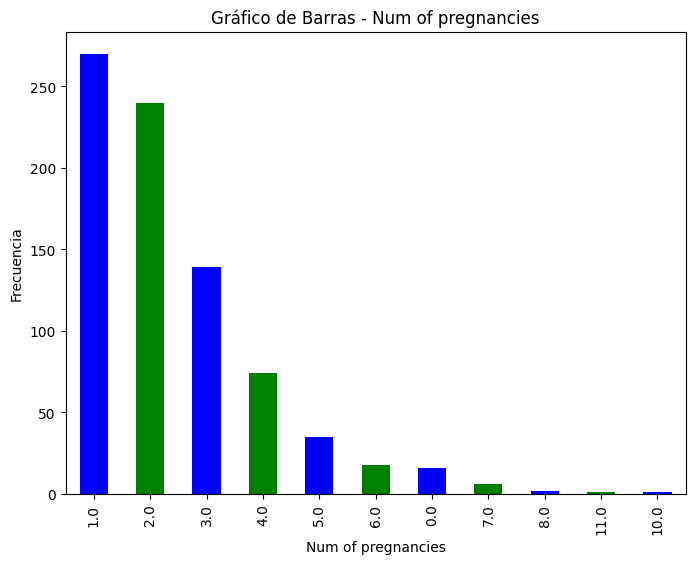

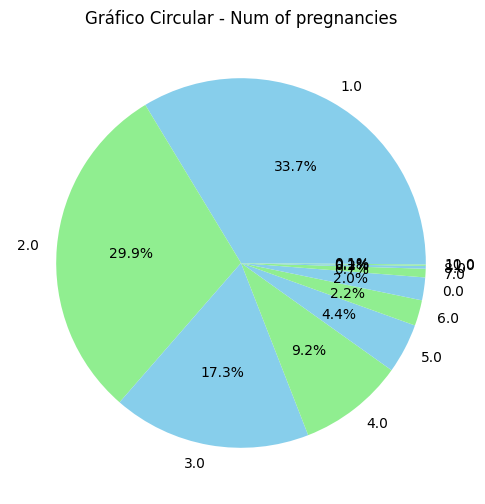

Tabla de Frecuencia - Num of pregnancies:
      Num of pregnancies
1.0                  270
2.0                  240
3.0                  139
4.0                   74
5.0                   35
6.0                   18
0.0                   16
7.0                    6
8.0                    2
11.0                   1
10.0                   1




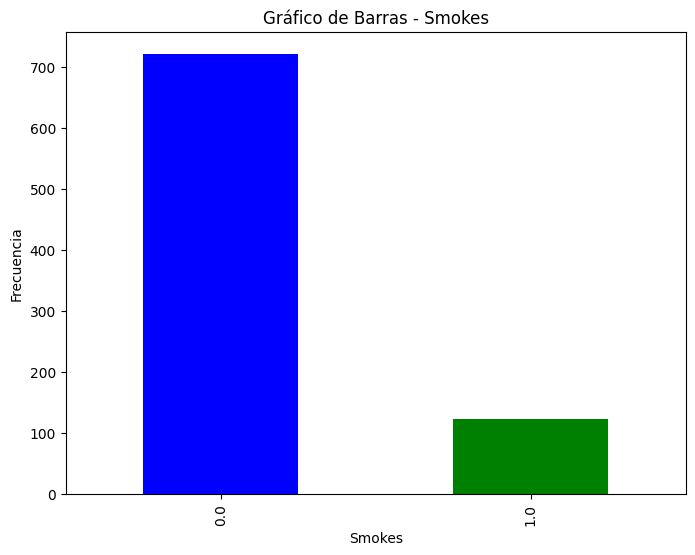

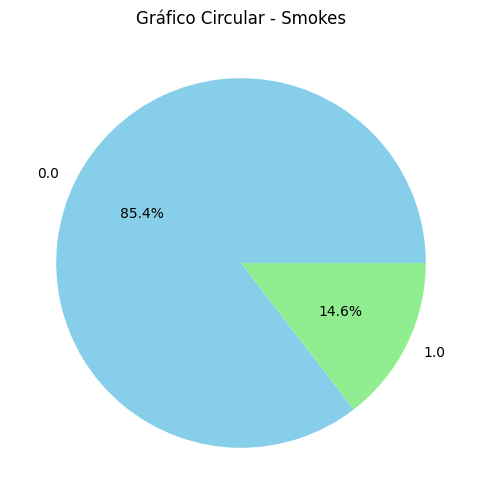

Tabla de Frecuencia - Smokes:
     Smokes
0.0     722
1.0     123




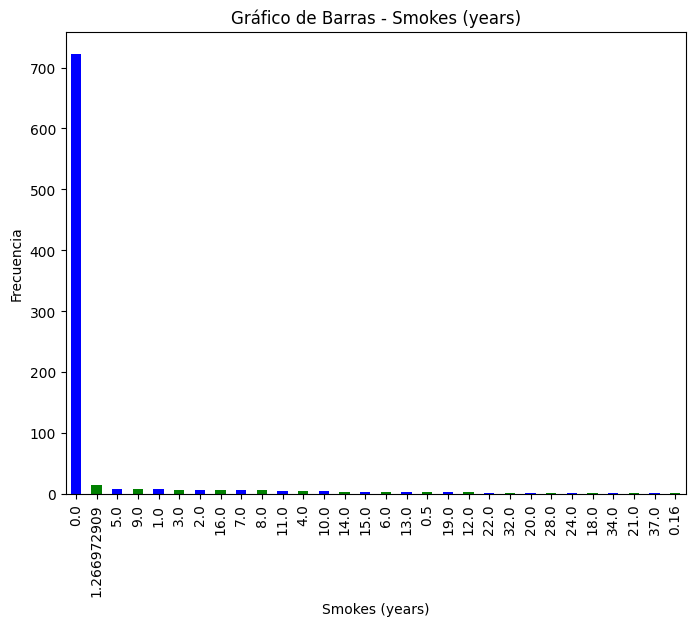

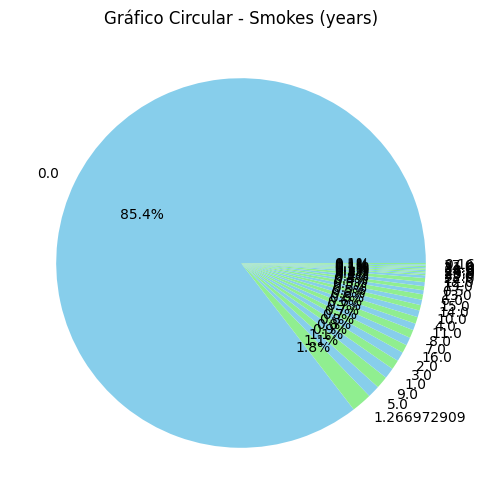

Tabla de Frecuencia - Smokes (years):
             Smokes (years)
0.0                     722
1.266972909              15
5.0                       9
9.0                       9
1.0                       8
3.0                       7
2.0                       7
16.0                      6
7.0                       6
8.0                       6
11.0                      5
4.0                       5
10.0                      5
14.0                      4
15.0                      4
6.0                       4
13.0                      3
0.5                       3
19.0                      3
12.0                      3
22.0                      2
32.0                      1
20.0                      1
28.0                      1
24.0                      1
18.0                      1
34.0                      1
21.0                      1
37.0                      1
0.16                      1




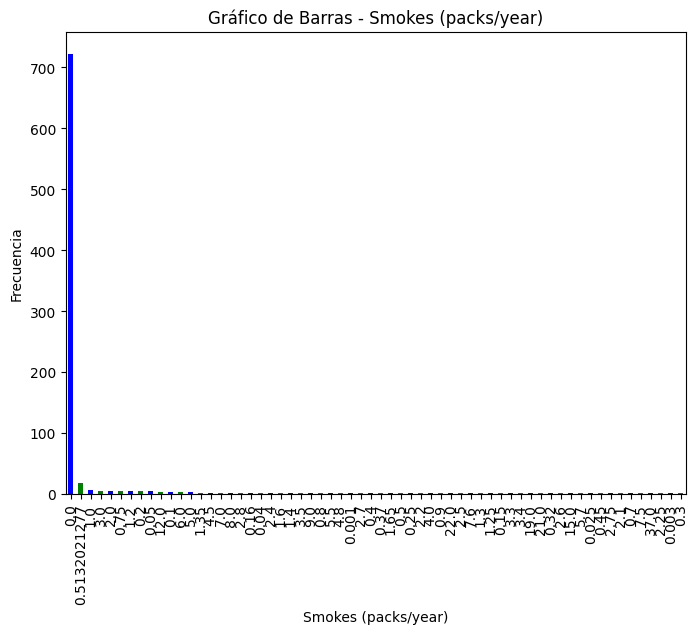

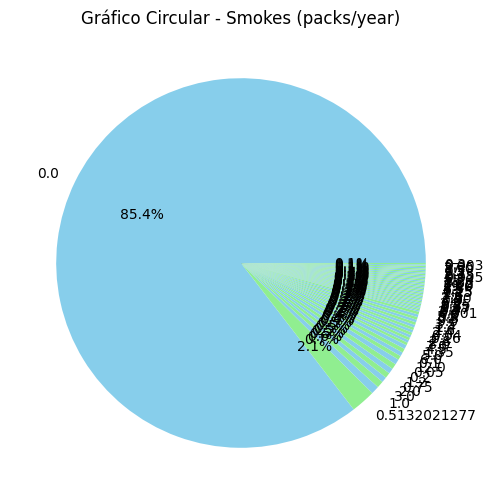

Tabla de Frecuencia - Smokes (packs/year):
              Smokes (packs/year)
0.0                           722
0.5132021277                   18
1.0                             6
3.0                             5
2.0                             4
...                           ...
7.5                             1
37.0                            1
2.25                            1
0.003                           1
0.3                             1

[62 rows x 1 columns]




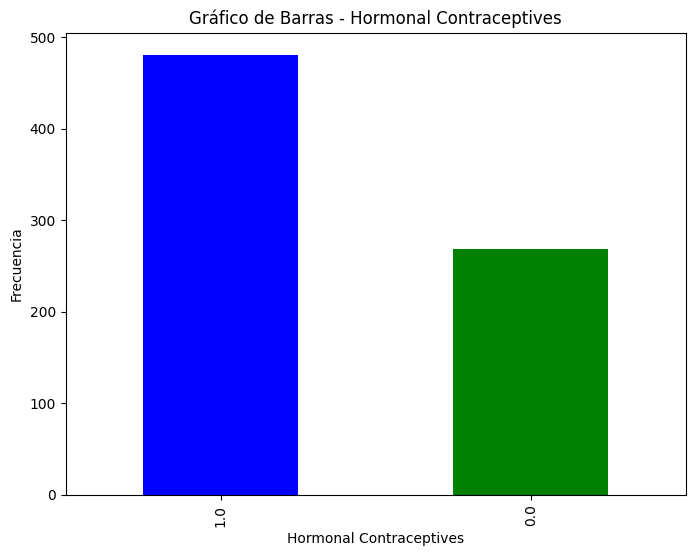

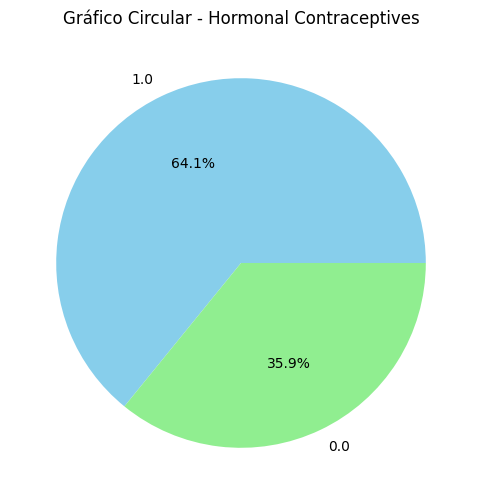

Tabla de Frecuencia - Hormonal Contraceptives:
     Hormonal Contraceptives
1.0                      481
0.0                      269




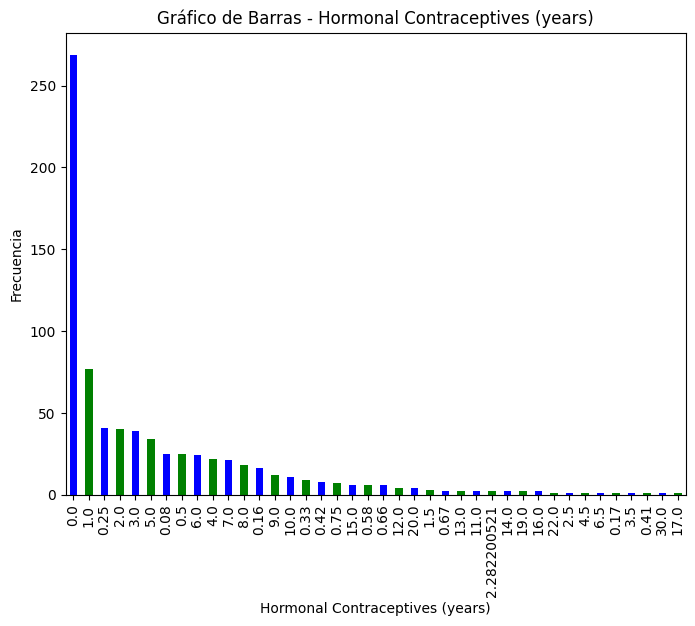

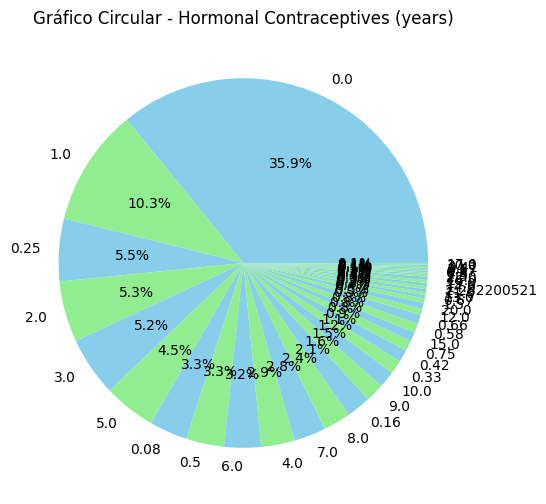

Tabla de Frecuencia - Hormonal Contraceptives (years):
             Hormonal Contraceptives (years)
0.0                                      269
1.0                                       77
0.25                                      41
2.0                                       40
3.0                                       39
5.0                                       34
0.08                                      25
0.5                                       25
6.0                                       24
4.0                                       22
7.0                                       21
8.0                                       18
0.16                                      16
9.0                                       12
10.0                                      11
0.33                                       9
0.42                                       8
0.75                                       7
15.0                                       6
0.58                                       6


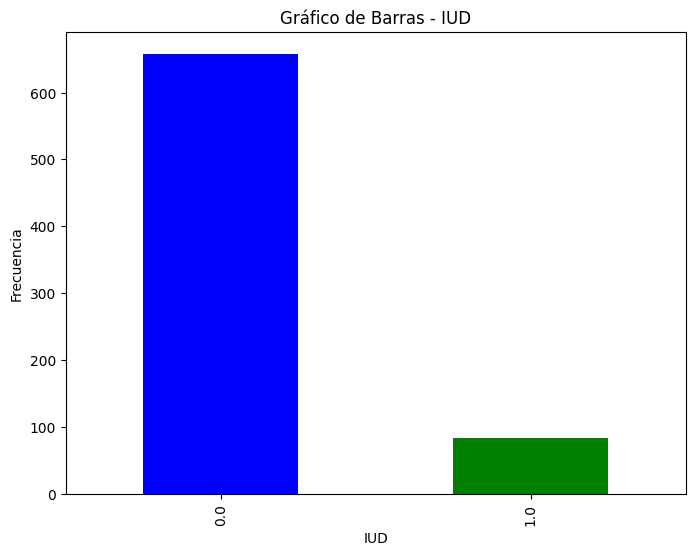

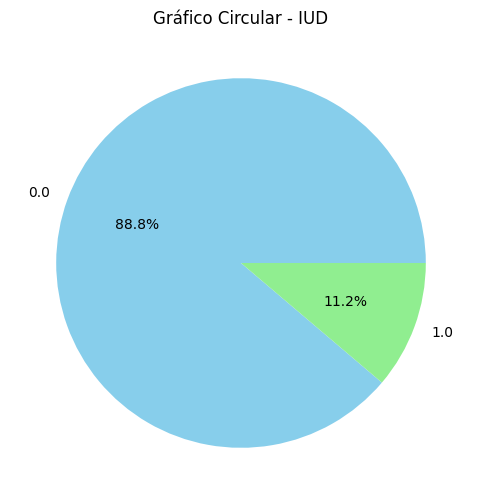

Tabla de Frecuencia - IUD:
     IUD
0.0  658
1.0   83




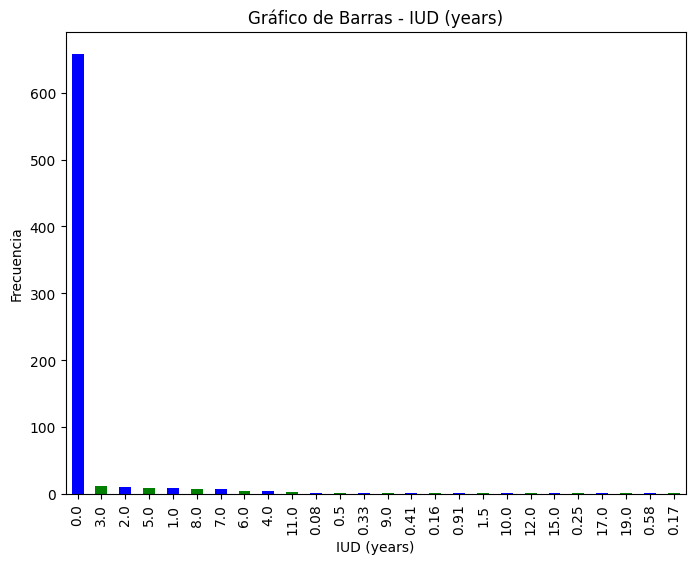

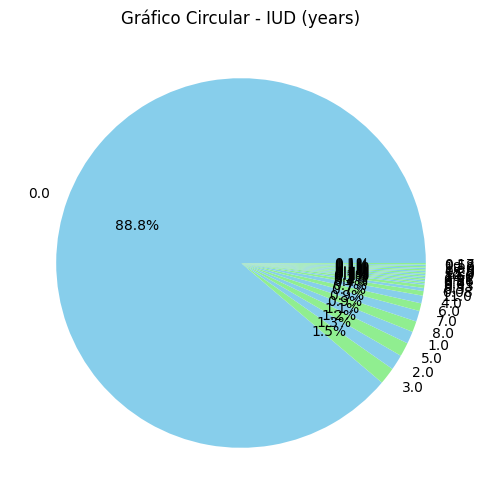

Tabla de Frecuencia - IUD (years):
      IUD (years)
0.0           658
3.0            11
2.0            10
5.0             9
1.0             8
8.0             7
7.0             7
6.0             5
4.0             5
11.0            3
0.08            2
0.5             2
0.33            1
9.0             1
0.41            1
0.16            1
0.91            1
1.5             1
10.0            1
12.0            1
15.0            1
0.25            1
17.0            1
19.0            1
0.58            1
0.17            1




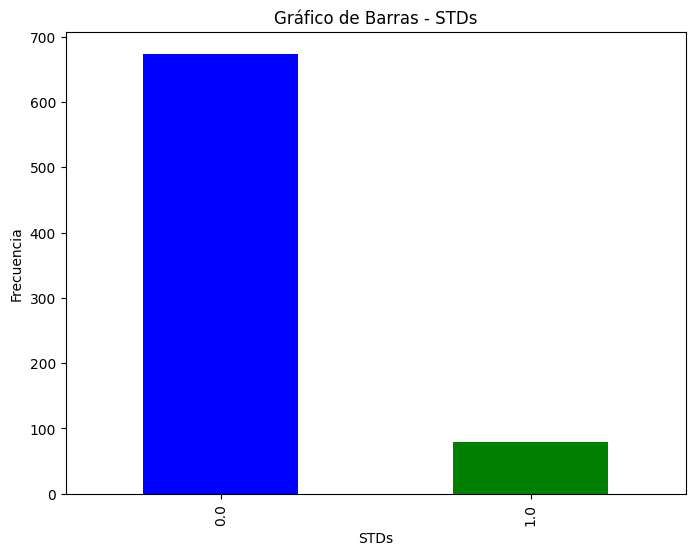

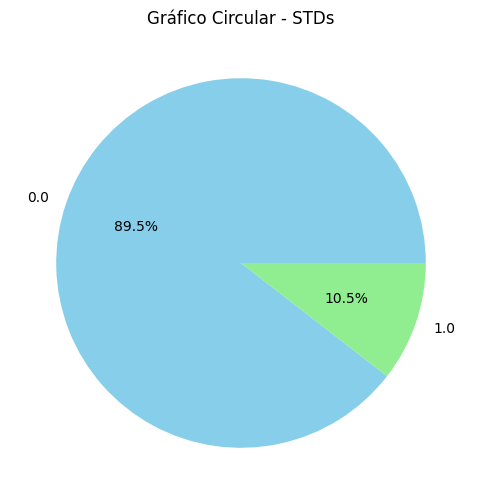

Tabla de Frecuencia - STDs:
     STDs
0.0   674
1.0    79




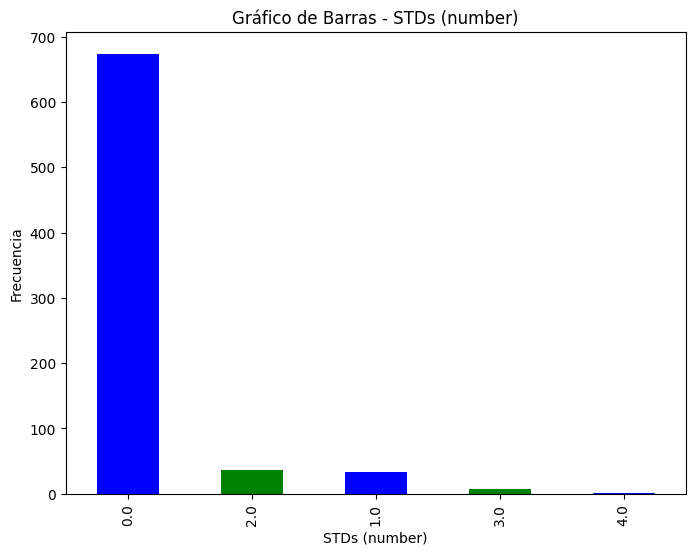

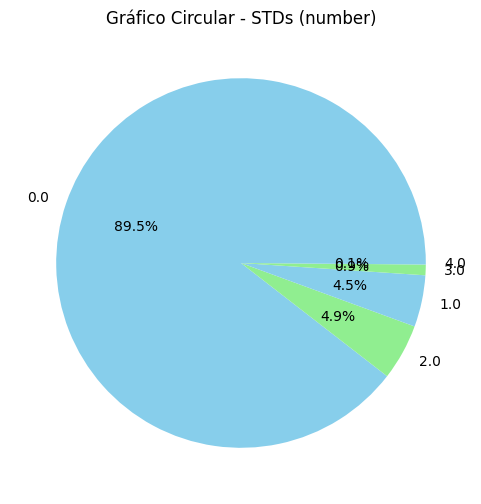

Tabla de Frecuencia - STDs (number):
     STDs (number)
0.0            674
2.0             37
1.0             34
3.0              7
4.0              1




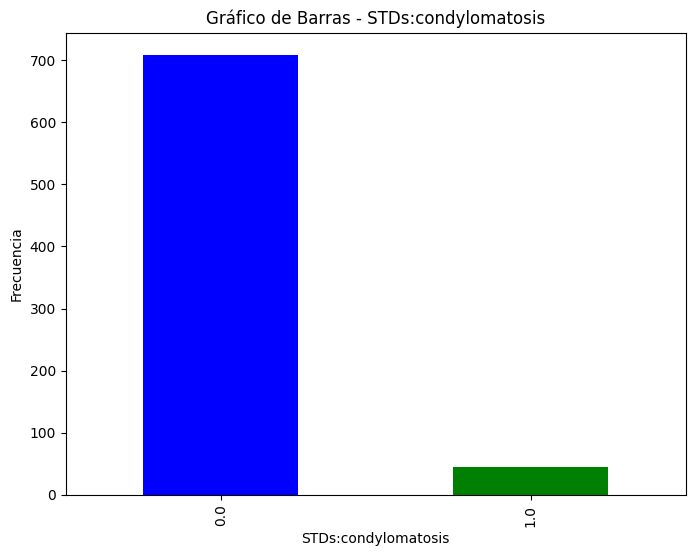

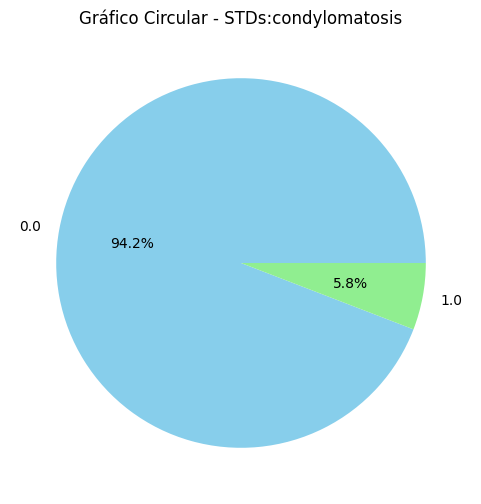

Tabla de Frecuencia - STDs:condylomatosis:
     STDs:condylomatosis
0.0                  709
1.0                   44




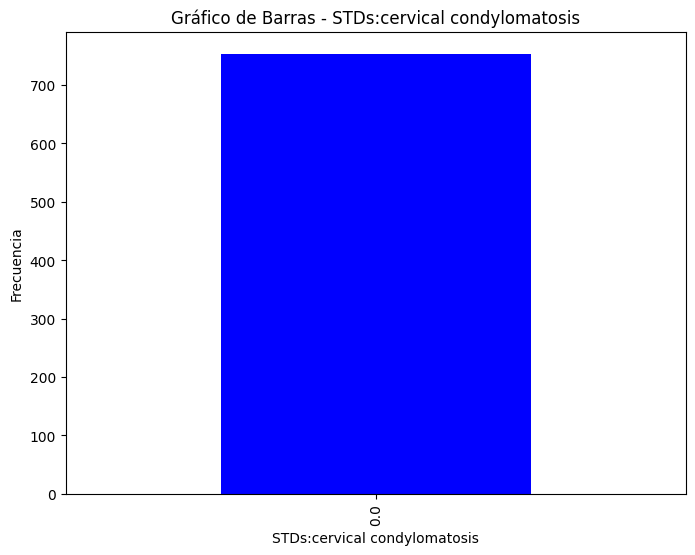

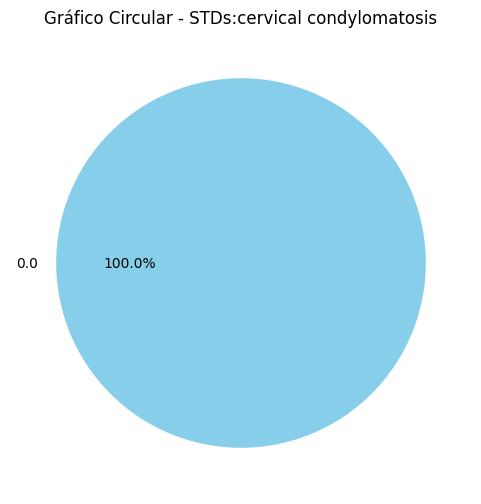

Tabla de Frecuencia - STDs:cervical condylomatosis:
     STDs:cervical condylomatosis
0.0                           753




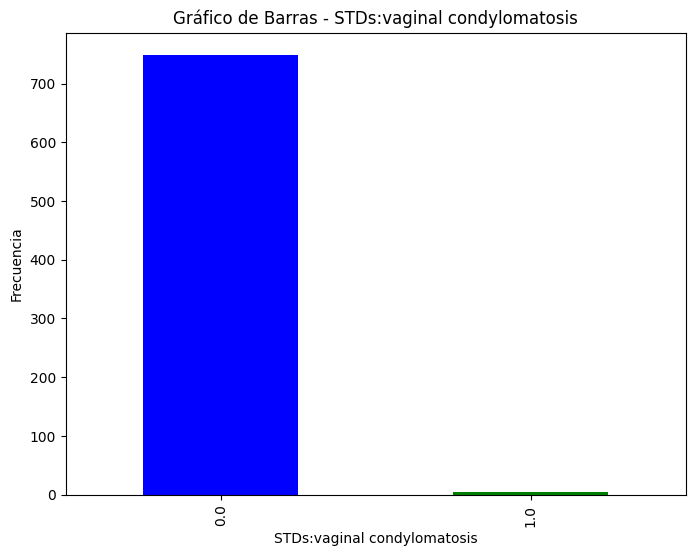

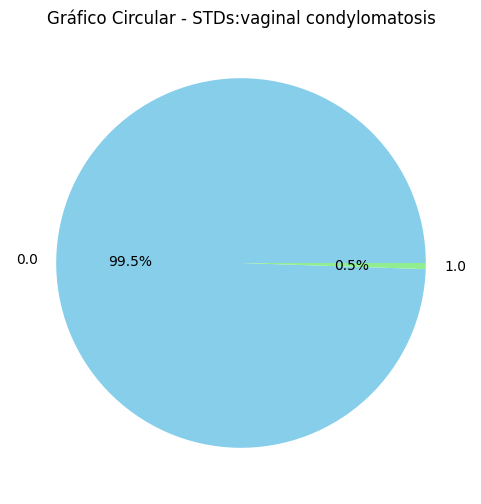

Tabla de Frecuencia - STDs:vaginal condylomatosis:
     STDs:vaginal condylomatosis
0.0                          749
1.0                            4




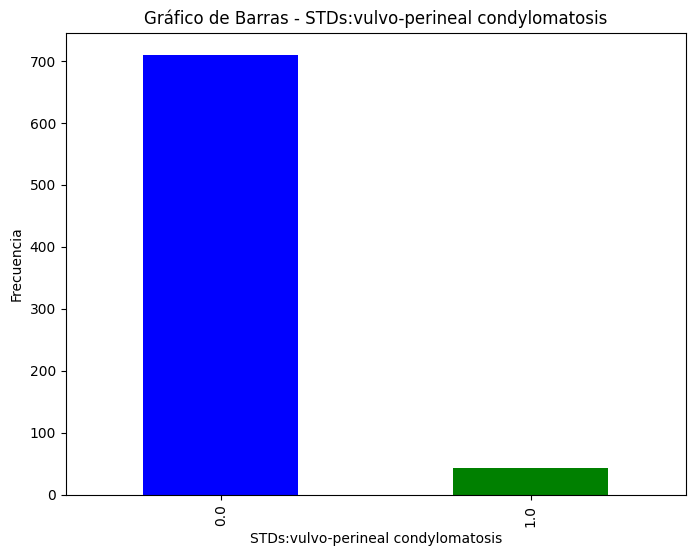

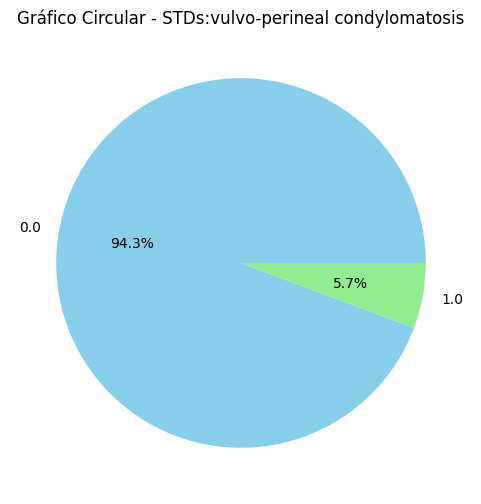

Tabla de Frecuencia - STDs:vulvo-perineal condylomatosis:
     STDs:vulvo-perineal condylomatosis
0.0                                 710
1.0                                  43




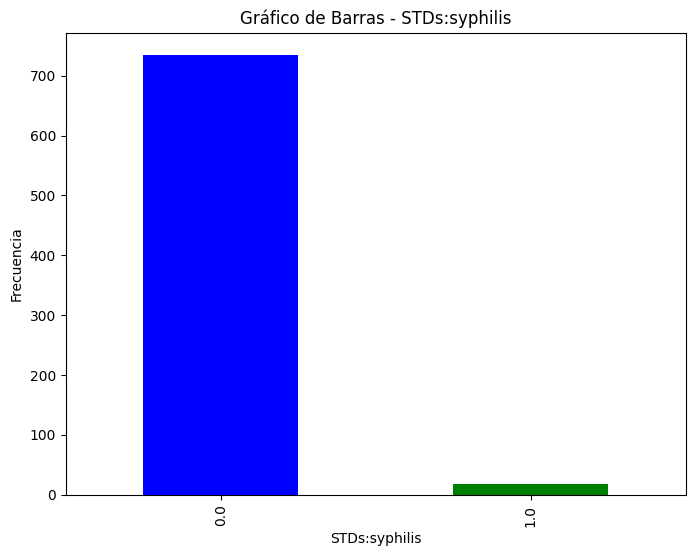

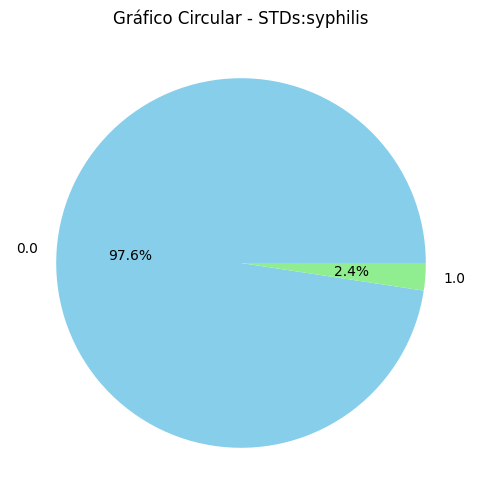

Tabla de Frecuencia - STDs:syphilis:
     STDs:syphilis
0.0            735
1.0             18




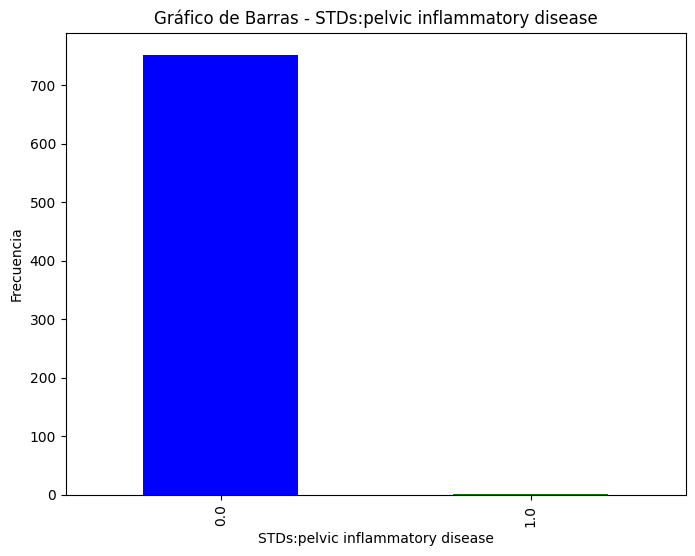

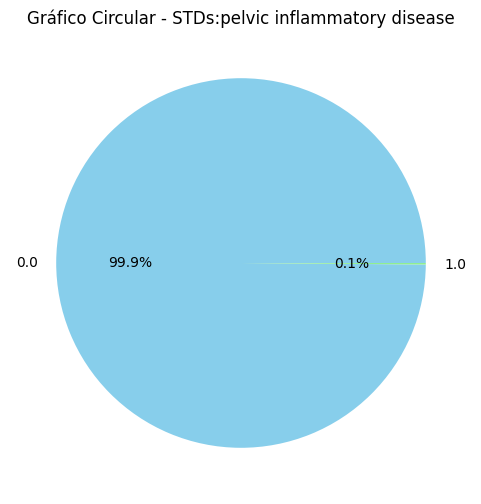

Tabla de Frecuencia - STDs:pelvic inflammatory disease:
     STDs:pelvic inflammatory disease
0.0                               752
1.0                                 1




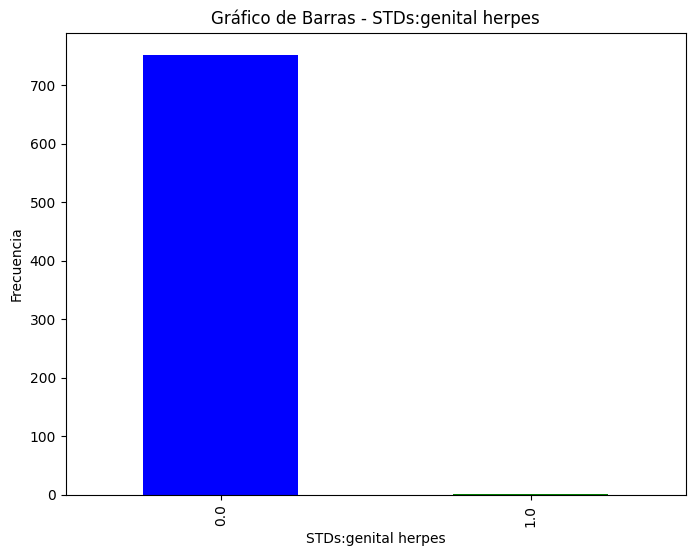

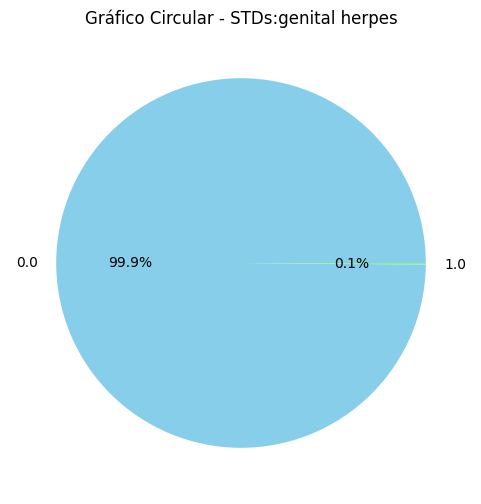

Tabla de Frecuencia - STDs:genital herpes:
     STDs:genital herpes
0.0                  752
1.0                    1




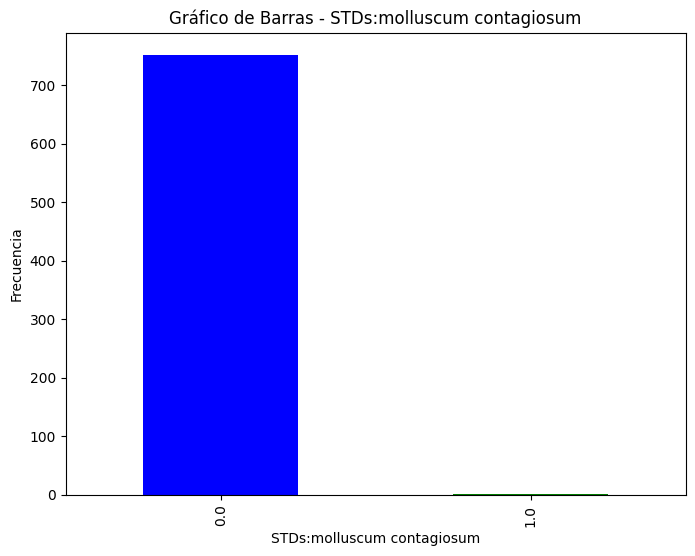

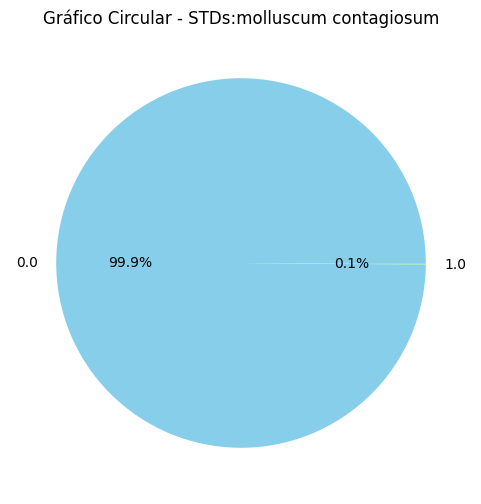

Tabla de Frecuencia - STDs:molluscum contagiosum:
     STDs:molluscum contagiosum
0.0                         752
1.0                           1




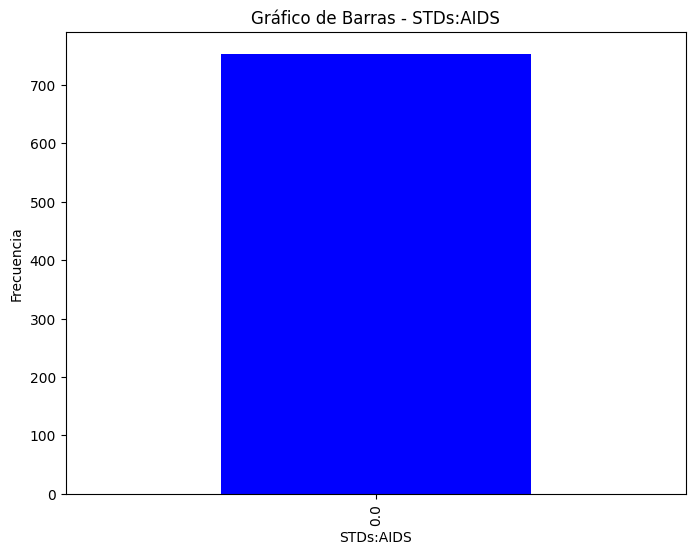

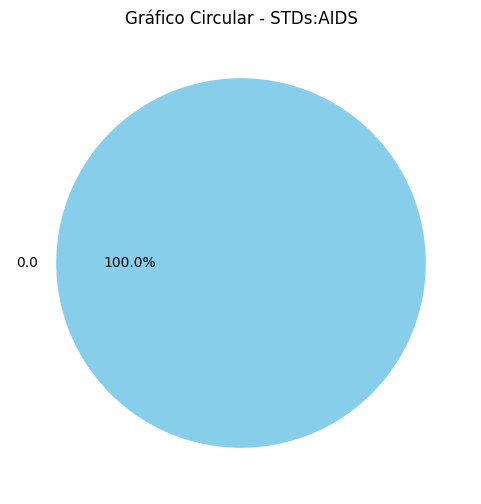

Tabla de Frecuencia - STDs:AIDS:
     STDs:AIDS
0.0        753




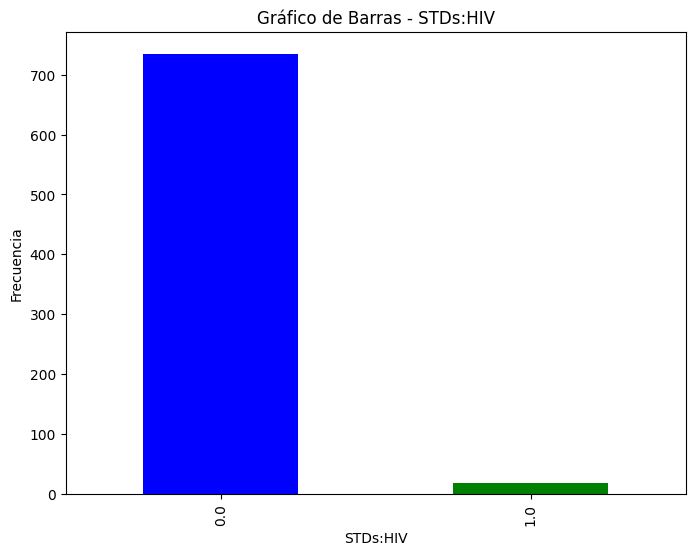

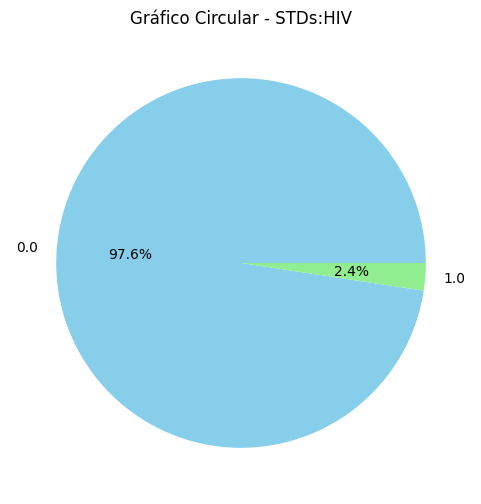

Tabla de Frecuencia - STDs:HIV:
     STDs:HIV
0.0       735
1.0        18




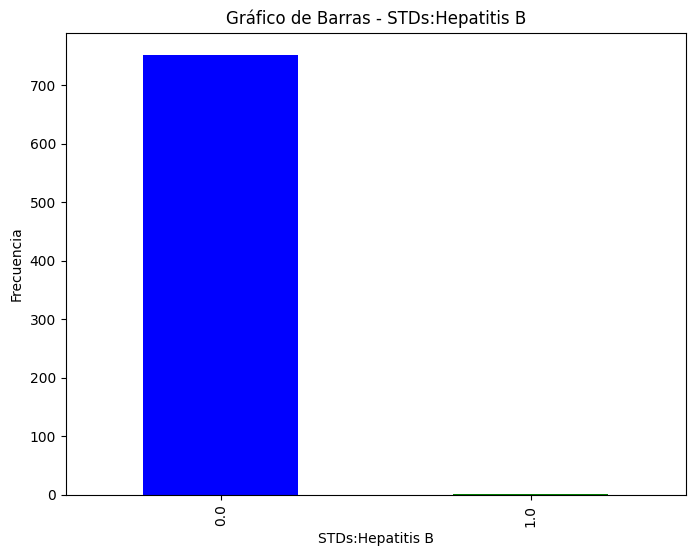

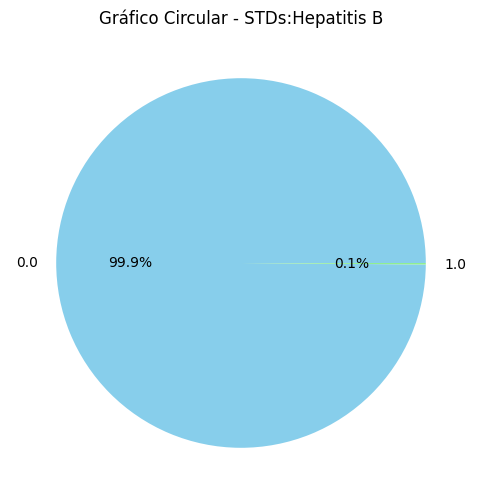

Tabla de Frecuencia - STDs:Hepatitis B:
     STDs:Hepatitis B
0.0               752
1.0                 1




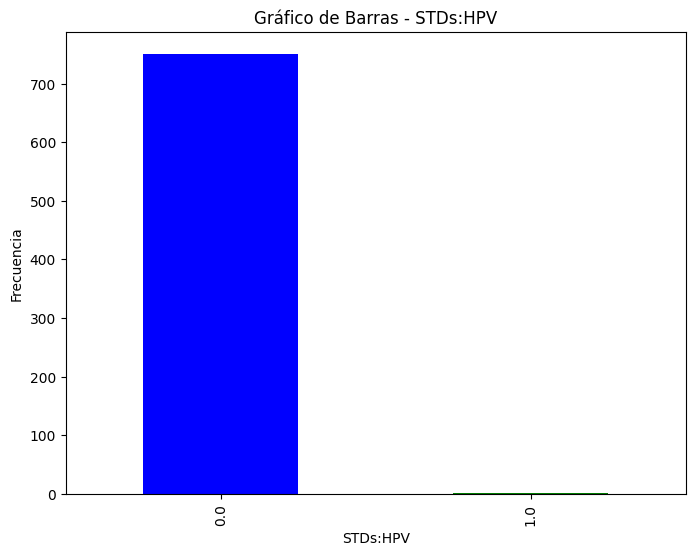

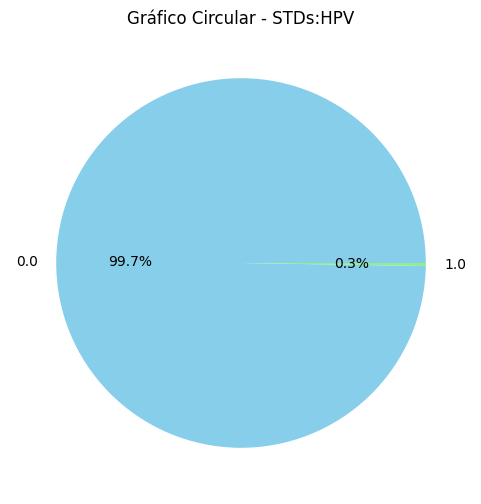

Tabla de Frecuencia - STDs:HPV:
     STDs:HPV
0.0       751
1.0         2




In [6]:
# Imprimiendo hacia abajo todas las variables categóricas.
print("Variables categóricas")
for columna in variables_categoricas:
    print(columna)


# Lista de columnas para las que se quiere generar las gráficas de barras
columnas = [
    "First sexual intercourse",
    "Num of pregnancies",
    "Smokes",
    "Smokes (years)",
    "Smokes (packs/year)",
    "Hormonal Contraceptives",
    "Hormonal Contraceptives (years)",
    "IUD",
    "IUD (years)",
    "STDs",
    "STDs (number)",
    "STDs:condylomatosis",
    "STDs:cervical condylomatosis",
    "STDs:vaginal condylomatosis",
    "STDs:vulvo-perineal condylomatosis",
    "STDs:syphilis",
    "STDs:pelvic inflammatory disease",
    "STDs:genital herpes",
    "STDs:molluscum contagiosum",
    "STDs:AIDS",
    "STDs:HIV",
    "STDs:Hepatitis B",
    "STDs:HPV"
]


# Generar las gráficas de barras, gráficas circulares y tablas de frecuencia para cada columna
for columna in columnas:
    # Gráfica de barras
    plt.figure(figsize=(8, 6))
    data[columna].value_counts().plot(kind='bar', color=['blue', 'green'])
    plt.title(f"Gráfico de Barras - {columna}")
    plt.xlabel(columna)
    plt.ylabel("Frecuencia")
    plt.show()

    # Gráfica circular
    plt.figure(figsize=(6, 6))
    data[columna].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
    plt.title(f"Gráfico Circular - {columna}")
    plt.ylabel('')
    plt.show()

    # Tabla de frecuencia
    tabla_frecuencia = data[columna].value_counts().to_frame()
    print(f"Tabla de Frecuencia - {columna}:")
    print(tabla_frecuencia)
    print("\n")

#### 6. Determine el comportamiento a seguir con los valores faltantes. Explique si necesita remover alguna variable por la cantidad de valores faltantes que tiene. ¿Es factible eliminar todos los valores faltantes de todas las variables?

In [7]:
# Obtén los nombres de las columnas
columnas = data.columns

print("Columnas")
columnas

Columnas


Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [8]:
# Contar los valores faltantes en cada columna
valores_faltantes = data.isnull().sum()

# Mostrar el número de valores faltantes en cada columna
valores_faltantes

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [9]:
# Obtener el total de datos no faltantes por columna
total_datos_por_columna = data.count()

# Mostrar el total de datos por columna
total_datos_por_columna

Age                                   858
Number of sexual partners             832
First sexual intercourse              851
Num of pregnancies                    802
Smokes                                845
Smokes (years)                        845
Smokes (packs/year)                   845
Hormonal Contraceptives               750
Hormonal Contraceptives (years)       750
IUD                                   741
IUD (years)                           741
STDs                                  753
STDs (number)                         753
STDs:condylomatosis                   753
STDs:cervical condylomatosis          753
STDs:vaginal condylomatosis           753
STDs:vulvo-perineal condylomatosis    753
STDs:syphilis                         753
STDs:pelvic inflammatory disease      753
STDs:genital herpes                   753
STDs:molluscum contagiosum            753
STDs:AIDS                             753
STDs:HIV                              753
STDs:Hepatitis B                  

#### Es prudente remover las columnas con muchos datos faltantes, como "STDs: Time since first diagnosis" y "STDs: Time since last diagnosis". Como la mayoría de los datos son faltantes, es poco probable que estas columnas aporten información significativa al análisis. Las demás columnas se pueden llenar con datos generados por, por ejemplo, algoritmos de aprendizaje basados en otras variables.

In [10]:
# Eliminamos las columnas con muchos datos faltantes
columns_to_drop = ['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis']
data_cleaned = data.drop(columns=columns_to_drop)

In [11]:
# Imputación para variables cuantitativas discretas
def impute_quantitative_discrete(data_cleaned, target_column):
    X_train = data_cleaned.drop(columns=[target_column])
    y_train = data_cleaned[target_column]

    imputation_model = LinearRegression()
    imputation_model.fit(X_train, y_train)

    X_impute = data_cleaned[data_cleaned[target_column].isnull()].drop(columns=[target_column])
    imputed_values = imputation_model.predict(X_impute)

    data_cleaned.loc[data_cleaned[target_column].isnull(), target_column] = imputed_values

# Imputación para variables categóricas nominales y binarias
def impute_categorical(data_cleaned, target_column):
    mode_value = data_cleaned[target_column].mode()[0]
    data_cleaned[target_column] = data_cleaned[target_column].fillna(mode_value)

# Lista de columnas con valores faltantes y su tipo
columns_with_missing_values = {
    'Age': 'Cuantitativa Discreta',
    'Number of sexual partners': 'Categórica Nominal',
    'First sexual intercourse': 'Categórica Nominal',
    'Num of pregnancies': 'Categórica Nominal',
    'Smokes': 'Categórica Nominal',
    'Smokes (years)': 'Categórica Nominal',
    'Smokes (packs/year)': 'Categórica Nominal',
    'Hormonal Contraceptives': 'Categórica Nominal',
    'Hormonal Contraceptives (years)': 'Categórica Nominal',
    'IUD': 'Categórica Nominal',
    'IUD (years)': 'Categórica Nominal',
    'STDs': 'Categórica Nominal',
    'STDs (number)': 'Categórica Nominal',
    'STDs:condylomatosis': 'Categórica Nominal',
    'STDs:cervical condylomatosis': 'Binaria',
    'STDs:vaginal condylomatosis': 'Categórica Nominal',
    'STDs:vulvo-perineal condylomatosis': 'Categórica Nominal',
    'STDs:syphilis': 'Categórica Nominal',
    'STDs:pelvic inflammatory disease': 'Categórica Nominal',
    'STDs:genital herpes': 'Categórica Nominal',
    'STDs:molluscum contagiosum': 'Categórica Nominal',
    'STDs:AIDS': 'Binaria',
    'STDs:HIV': 'Categórica Nominal',
    'STDs:Hepatitis B': 'Categórica Nominal',
    'STDs:HPV': 'Categórica Nominal',
    'STDs: Number of diagnosis': 'Cuantitativa Discreta',
    'Dx:Cancer': 'Binaria',
    'Dx:CIN': 'Binaria',
    'Dx:HPV': 'Binaria',
    'Dx': 'Binaria',
    'Hinselmann': 'Binaria',
    'Schiller': 'Binaria',
    'Citology': 'Binaria',
    'Biopsy': 'Binaria'
}

# Iterar sobre las columnas con valores faltantes y aplicar la imputación correspondiente
for column, data_type in columns_with_missing_values.items():
    if data_type == 'Cuantitativa Discreta':
        #impute_quantitative_discrete(data_cleaned, column)
        pass
    elif data_type in ('Categórica Nominal', 'Binaria'):
        impute_categorical(data_cleaned, column)


In [12]:
# Contar los valores faltantes en cada columna
valores_faltantes = data_cleaned.isnull().sum()

# Mostrar el número de valores faltantes en cada columna
valores_faltantes

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


#### 7. Estudie si es posible hacer transformaciones en las variables categóricas para incluirlas en el PCA, ¿valdrá la pena?

#### El PCA está diseñado para trabajar con variables numéricas continuas, y la inclusión de variables categóricas en el PCA requiere modificaciones para representar la información de manera apropiada.

In [13]:
#data_cleaned.to_csv('data_cleaned.csv', index=False)

#### Es mejor no incluir este tipo de variables en el PCA. Al incluir estas variables en el PCA, se esta forzando una interpretación numérica que puede no tener sentido en el contexto del análisis. Además, la importancia de estas variables no se reflejaría en la representación numérica al aplicar PCA. También se dificulta la interpretación entre relaciones de variable original y modificada.

#### 8. Estudie si es conveniente hacer un Análisis de Componentes Principales. Recuerde que puede usar el índice KMO y el test de esfericidad de Bartlett. Haga un análisis de componentes principales con las variables numéricas, discuta los resultados e interprete los componentes.

In [14]:
data_cleaned

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [15]:
# Paso 1: Discretizar las variables numéricas
# Seleccionar las columnas numéricas
columns_numeric = data_cleaned.select_dtypes(include=[np.number]).columns

# Definir el número de intervalos en los que se dividirán los datos
num_bins = 5

# Discretizar las columnas numéricas usando la estrategia de binning (intervalos)
for column in columns_numeric:
    data_cleaned[column] = pd.cut(data_cleaned[column], bins=num_bins, labels=False)
    
# Paso 2: Convertir las columnas discretizadas de las numéricas a tipo Categorical
data_cleaned[columns_numeric] = data_cleaned[columns_numeric].astype('int')

# Filtrar las variables numéricas del DataFrame data_cleaned
numeric_columns = ['Age', 'STDs: Number of diagnosis', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)']

# Crear un DataFrame con las variables numéricas
data_numeric = data_cleaned[numeric_columns]

# Convertir las columnas numéricas a tipo float
data_numeric = data_numeric.astype(float)

# Calcular el índice KMO y el test de esfericidad de Bartlett
kmo_all, kmo_model = calculate_kmo(data_numeric)
bartlett_test = calculate_bartlett_sphericity(data_numeric)

# Redondear el valor p de Bartlett a 5 decimales
bartlett_p_value = round(bartlett_test[1], 5)

# Imprimir los resultados
print("Indice KMO:", kmo_model)
print("Valor-p del test de Bartlett:", bartlett_p_value)

Indice KMO: 0.5229842974928552
Valor-p del test de Bartlett: 0.0


In [16]:
# Estandarizar los datos numéricos
scaler = StandardScaler()
data_numeric_standardized = scaler.fit_transform(data_numeric)

# Crear el objeto PCA y ajustarlo a los datos
pca = PCA()
pca.fit(data_numeric_standardized)

# Obtener los componentes principales
components = pca.components_

# Imprimir los resultados
print("Varianza explicada por cada componente:")
print(pca.explained_variance_ratio_)
print("\nComponentes principales:")
print(pd.DataFrame(components, columns=data_numeric.columns))

Varianza explicada por cada componente:
[0.21289127 0.18495089 0.15092798 0.11092086 0.09823809 0.08678916
 0.07581606 0.04091037 0.02678929 0.01176602]

Componentes principales:
        Age  STDs: Number of diagnosis  Number of sexual partners  \
0  0.379469                   0.275787                   0.222514   
1 -0.259096                   0.639902                  -0.027544   
2 -0.439854                  -0.114523                   0.247280   
3 -0.102723                   0.013259                   0.387164   
4  0.026219                  -0.017461                  -0.179685   
5  0.203410                  -0.018910                   0.799236   
6 -0.152972                  -0.028278                   0.244651   
7  0.714658                   0.016417                  -0.086936   
8  0.092635                   0.066826                  -0.014405   
9 -0.008262                   0.703547                   0.001036   

   First sexual intercourse  Num of pregnancies  Smokes (year

#### Análisis: Si se obtienen valores de KMO cercanos a 1 y un valor-p significativo para el test de Bartlett, esto dice que el PCA es apropiado para las variables numéricas. Podemos ver que el índice de KMO es de 0.52. El índice es bajo, lo que indica que la adaptación de los datos podría ser marginal o no muy adecuada. Significa que no hay mucha correlación entre variables. Por otro lado, el valor p del test de esfericidad de Bartlett es de 0.0, lo que indica que el test rechaza la hipótesis nula de que la matriz de covarianza sea una matriz de identidad (esfericidad). Existe suficiente correlación entre las variables y, por lo tanto, el PCA puede ser una opción válida para reducir la dimensionalidad de los datos al trabajar con ellos.

#### En el análisis de componentes principales (PCA), la varianza explicada por cada componente indica cuánta varianza de los datos es explicada por cada componente principal. Estos valores nos indican la proporción de la varianza total que es explicada por cada componente principal. Cuanto mayor sea la varianza explicada por un componente, más información importante contiene sobre la variabilidad de los datos. Podemos ver que las variables Age, STDs: Number of diagnosis y Number of sexual partners tienen contribuciones significativas.

#### 9. Obtenga reglas de asociación interesantes del dataset. Recuerde discretizar las variables numéricas. Genere reglas con diferentes niveles de confianza y soporte. Discuta los resultados. Si considera que debe eliminar variables porque son muy frecuentes y con eso puede recibir más insigths de la generación de reglas. Hágalo y discútalo.

In [17]:
columnas = data_cleaned.columns
print("Columnas:")
print(columnas)

tipos_de_datos = data_cleaned.dtypes
print("\nTipos de datos de cada columna:")
print(tipos_de_datos)

Columnas:
Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

Tipos de datos de cada columna:
Age                                    int32
Number of sexual partners             object
First sexual intercourse              object
Num of pregnancies                    object
Smokes                      

In [18]:
# Lista de columnas que deben convertirse a tipo numérico
numeric_columns = ['Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies',
                   'Smokes', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives',
                   'Hormonal Contraceptives (years)', 'IUD', 'IUD (years)', 'STDs', 'STDs (number)',
                   'STDs:condylomatosis', 'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
                   'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease',
                   'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
                   'STDs:Hepatitis B', 'STDs:HPV']

# Convertir las columnas a tipo numérico
data_cleaned[numeric_columns] = data_cleaned[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [19]:
# Calcular las frecuencias de cada valor único en cada columna
column_frequencies = {}
for column in data_cleaned.columns:
    column_frequencies[column] = data_cleaned[column].value_counts(normalize=True)

# Mostrar las frecuencias de cada valor único en cada columna
for column, frequencies in column_frequencies.items():
    pass
    #print(f"Columna: {column}")
    #print(frequencies)
    #print("\n")

# Identificar las columnas con valores dominantes o muy frecuentes
frequent_columns = []
for column, frequencies in column_frequencies.items():
    if frequencies.max() >= 0.9:  # Puedes ajustar el umbral según tu criterio
        frequent_columns.append(column)

print("Columnas con valores dominantes o muy frecuentes:")
frequent_columns

Columnas con valores dominantes o muy frecuentes:


['IUD',
 'IUD (years)',
 'STDs',
 'STDs (number)',
 'STDs:condylomatosis',
 'STDs:cervical condylomatosis',
 'STDs:vaginal condylomatosis',
 'STDs:vulvo-perineal condylomatosis',
 'STDs:syphilis',
 'STDs:pelvic inflammatory disease',
 'STDs:genital herpes',
 'STDs:molluscum contagiosum',
 'STDs:AIDS',
 'STDs:HIV',
 'STDs:Hepatitis B',
 'STDs:HPV',
 'STDs: Number of diagnosis',
 'Dx:Cancer',
 'Dx:CIN',
 'Dx:HPV',
 'Dx',
 'Hinselmann',
 'Schiller',
 'Citology',
 'Biopsy']

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
853,3,0,0,0,0,0,0,0,0,0
854,3,0,0,0,0,0,0,0,0,0
855,2,0,0,0,0,0,0,0,0,0
856,3,0,0,0,0,0,0,0,0,0


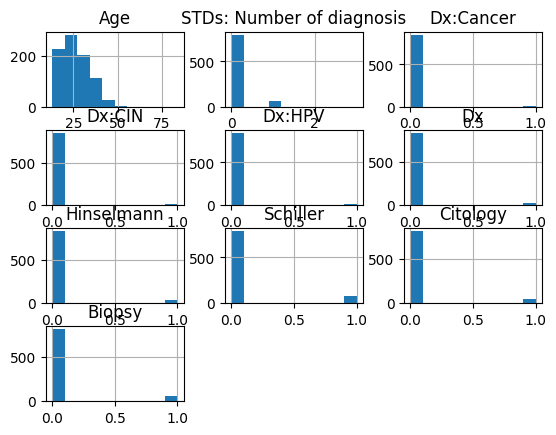

In [20]:
# Obtener la lista de columnas numéricas
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Visualizar las distribuciones (opcional)
data[numeric_columns].hist()

# Elegir el número de bins (intervalos) para el método de igual frecuencia
num_bins = 5

# Aplicar el método de igual frecuencia a cada columna numérica
for column in numeric_columns:
    data[column] = pd.qcut(data[column], num_bins, labels=False, duplicates='drop')

# Ver los resultados de las columnas discretizadas
data[numeric_columns]

In [21]:
data_numeric = data_cleaned[numeric_columns]

# Discretizar las variables numéricas utilizando KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
data_discretized = discretizer.fit_transform(data_numeric)

# Convertir los valores discretos en valores binarios (0 o 1)
data_discretized[data_discretized > 0] = 1

# Convertir el DataFrame discretizado a un nuevo DataFrame con nombres de columnas originales
data_discretized = pd.DataFrame(data_discretized, columns=data_numeric.columns)

# Aplicar el algoritmo Apriori para encontrar conjuntos de ítems frecuentes
frequent_itemsets = apriori(data_discretized, min_support=0.05, use_colnames=True)

# Generar reglas de asociación a partir de los conjuntos de ítems frecuentes
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

# Imprimir las reglas de asociación
rules


C:\Users\Gamer\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\Gamer\AppData\Roaming\Python\Python310\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Biopsy),(Schiller),0.064103,0.086247,0.055944,0.872727,10.118919,0.050415,7.179487,0.962900
1,(Schiller),(Biopsy),0.086247,0.064103,0.055944,0.648649,10.118919,0.050415,2.663708,0.986235


#### Regla: 
antecedents: (Schiller)
consequents: (Biopsy)
support: 0.055944
confidence: 0.648649
lift: 10.118919
leverage: 0.050415
conviction: 2.663708
zhangs_metric: 0.986235
Esto indica que la variable Schiller representa el 5.59% de las transacciones. La variable Biopsy aparece el 64.86% de las veces que Schiller aparece en la transacción. La probabilidad de que ambas variables ocurran juntas es 10.12 veces mayor que la probabilidad esperada si fueran variables independientes, según el valor de elevación.

#### Regla:
antecedents: (Biopsy)
consequents: (Schiller)
support: 0.055944
confidence: 0.872727
lift: 10.118919
leverage: 0.050415
conviction: 7.179487
zhangs_metric: 0.962900
El antecedente de esta regla es Biopsy, y el consecuente es Schiller. El soporte es del 5.59%, lo que significa que la variable Biopsy representa el 5.59% de las transacciones. La confianza es del 87.27%, lo que significa que la variable Schiller aparece el 87.27% de las veces que Biopsy aparece en la transacción. La probabilidad de que ambas variables ocurran juntas es 10.12 veces mayor que la probabilidad esperada si fueran independientes, según el valor de elevación. Un aumento superior an uno indica una relación positiva entre las variables. La variable Biopsy es 7.18 veces más probable de aparecer en transacciones que no contienen Schiller, según el valor de convicción de 7.18. Un valor mayor a 1 en conviction indica una asociación fuerte entre el antecedente y el consecuente.

In [22]:
# Definir los nuevos valores de soporte mínimo y confianza mínimo
min_support = 0.03
min_confidence = 0.7

# Aplicar el algoritmo Apriori con los nuevos valores de umbral
frequent_itemsets = apriori(data_discretized, min_support=min_support, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)

# Imprimir las reglas de asociación con los nuevos umbrales
rules

C:\Users\Gamer\AppData\Roaming\Python\Python310\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Hinselmann),(Schiller),0.040793,0.086247,0.039627,0.971429,11.263320,0.036109,31.981352,0.949968
1,(Biopsy),(Schiller),0.064103,0.086247,0.055944,0.872727,10.118919,0.050415,7.179487,0.962900
2,"(Biopsy, Age)",(Schiller),0.033800,0.086247,0.032634,0.965517,11.194781,0.029719,26.498834,0.942530
3,"(Schiller, Age)",(Biopsy),0.045455,0.064103,0.032634,0.717949,11.200000,0.029720,3.318182,0.954082


#### Nueva regla con otros valores de soporte y confianza:
El antecedente es Hinselmann y el resultado es Schiller. El soporte es del 3.96%, lo que significa que aproximadamente 3.96% de las transacciones contienen la variable Hinselmann. La confianza es del 97.14%, lo que significa que la variable Schiller también aparece el 97.14% de las veces que Hinselmann aparece en una transacción.
La probabilidad de que ambas variables ocurran juntas es 11.26 veces mayor que la probabilidad esperada si fueran independientes, según el valor lift de 11.26. Un ascenso superior an uno indica una relación positiva entre las variables.
La variable Hinselmann es 31.98 veces más probable de aparecer en las transacciones que no contienen Schiller, según el valor de convicción. 